In [1]:
# @joseMaria 
# JMGONB

In [2]:

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [4]:
df=pd.read_csv(url)


In [5]:
df=df.set_index("iso_code")
df

continent       location        date  total_cases  new_cases  \
iso_code                                                                
AFG           Asia    Afghanistan  2019-12-31          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-01          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-02          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-03          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-04          0.0        0.0   
...            ...            ...         ...          ...        ...   
NaN            NaN  International  2020-08-18        696.0        NaN   
NaN            NaN  International  2020-08-19        696.0        NaN   
NaN            NaN  International  2020-08-20        696.0        NaN   
NaN            NaN  International  2020-08-21        696.0        NaN   
NaN            NaN  International  2020-08-22        696.0        NaN   

          new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
iso_code                                                                      
AFG                      NaN           0.0         0.0                  NaN   
AFG                      NaN           0.0         0.0                  NaN   
AFG                      NaN           0.0         0.0                  NaN   
AFG                      NaN           0.0         0.0                  NaN   
AFG                      NaN           0.0         0.0                  NaN   
...                      ...           ...         ...                  ...   
NaN                      NaN           7.0         NaN                  NaN   
NaN                      NaN           7.0         NaN                  NaN   
NaN                      NaN           7.0         NaN                  NaN   
NaN                      NaN           7.0         NaN                  NaN   
NaN                      NaN           7.0         NaN                  NaN   

          total_cases_per_million  ...  aged_70_older  gdp_per_capita  \
iso_code                           ...                                  
AFG                           0.0  ...          1.337        1803.987   
AFG                           0.0  ...          1.337        1803.987   
AFG                           0.0  ...          1.337        1803.987   
AFG                           0.0  ...          1.337        1803.987   
AFG                           0.0  ...          1.337        1803.987   
...                           ...  ...            ...             ...   
NaN                           NaN  ...            NaN             NaN   
NaN                           NaN  ...            NaN             NaN   
NaN                           NaN  ...            NaN             NaN   
NaN                           NaN  ...            NaN             NaN   
NaN                           NaN  ...            NaN             NaN   

          extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
iso_code                                                                
AFG                   NaN                597.029                 9.59   
AFG                   NaN                597.029                 9.59   
AFG                   NaN                597.029                 9.59   
AFG                   NaN                597.029                 9.59   
AFG                   NaN                597.029                 9.59   
...                   ...                    ...                  ...   
NaN                   NaN                    NaN                  NaN   
NaN                   NaN                    NaN                  NaN   
NaN                   NaN                    NaN                  NaN   
NaN                   NaN                    NaN                  NaN   
NaN                   NaN                    NaN                  NaN   

          female_smokers  male_smokers  handwashing_facilities  \
iso_code                                                         

In [6]:
df1=df.loc[["IND","PER","USA","FRA","ESP"],:]
df1.head()

continent location        date  total_cases  new_cases  \
iso_code                                                          
IND           Asia    India  2019-12-31          0.0        0.0   
IND           Asia    India  2020-01-01          0.0        0.0   
IND           Asia    India  2020-01-02          0.0        0.0   
IND           Asia    India  2020-01-03          0.0        0.0   
IND           Asia    India  2020-01-04          0.0        0.0   

          new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
iso_code                                                                      
IND                      NaN           0.0         0.0                  NaN   
IND                      NaN           0.0         0.0                  NaN   
IND                      NaN           0.0         0.0                  NaN   
IND                      NaN           0.0         0.0                  NaN   
IND                      NaN           0.0         0.0                  NaN   

          total_cases_per_million  ...  aged_70_older  gdp_per_capita  \
iso_code                           ...                                  
IND                           0.0  ...          3.414        6426.674   
IND                           0.0  ...          3.414        6426.674   
IND                           0.0  ...          3.414        6426.674   
IND                           0.0  ...          3.414        6426.674   
IND                           0.0  ...          3.414        6426.674   

          extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
iso_code                                                                
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   

          female_smokers  male_smokers  handwashing_facilities  \
iso_code                                                         
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   

          hospital_beds_per_thousand  life_expectancy  
iso_code                                               
IND                             0.53            69.66  
IND                             0.53            69.66  
IND                             0.53            69.66  
IND                             0.53            69.66  
IND                             0.53            69.66  

[5 rows x 39 columns]

In [7]:
df1['date']=pd.to_datetime(df1['date'],format="%Y/%m/%d")

In [8]:
# Cambiamos los valores Nan por ceros

h=df1.pivot_table('new_deaths', index='date',columns='location')
h=h.fillna(0)
h

location    France   India   Peru  Spain  United States
date                                                   
2019-12-31     0.0     0.0    0.0    0.0            0.0
2020-01-01     0.0     0.0    0.0    0.0            0.0
2020-01-02     0.0     0.0    0.0    0.0            0.0
2020-01-03     0.0     0.0    0.0    0.0            0.0
2020-01-04     0.0     0.0    0.0    0.0            0.0
...            ...     ...    ...    ...            ...
2020-08-18    19.0   876.0  200.0   24.0          445.0
2020-08-19    22.0  1092.0  177.0  127.0         1324.0
2020-08-20    17.0   977.0  176.0   16.0         1356.0
2020-08-21    12.0   983.0  200.0   25.0         1078.0
2020-08-22    23.0   945.0  211.0    0.0         1151.0

[236 rows x 5 columns]

In [9]:
h.index=pd.to_datetime(h.index)  

In [10]:
# El 27 de abril detectamos un outlier en España. La cifra que aparece es de 0, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 331. La cambiamos.
h.loc['2020-04-27'][3]=331

In [11]:
# El 22 de mayo detectamos un outlier en España. La cifra que aparece es de 688, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 56. La cambiamos.
h.loc['2020-05-22'][3]=56

In [12]:
 #El 25 de mayo detectamos otro outlier en España. La cifra que aparece es de -1918, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y ese día no se facilitó cifra concreta sino que se dio como dato la de los fallecidos en los últimos 7 días, que fue 50, entendemos que era la tendencia. La cambiamos.
h.loc['2020-05-25'][3]=50

In [13]:
h["d_averages"]=h.mean(axis=1)
h

location    France   India   Peru  Spain  United States  d_averages
date                                                               
2019-12-31     0.0     0.0    0.0    0.0            0.0         0.0
2020-01-01     0.0     0.0    0.0    0.0            0.0         0.0
2020-01-02     0.0     0.0    0.0    0.0            0.0         0.0
2020-01-03     0.0     0.0    0.0    0.0            0.0         0.0
2020-01-04     0.0     0.0    0.0    0.0            0.0         0.0
...            ...     ...    ...    ...            ...         ...
2020-08-18    19.0   876.0  200.0   24.0          445.0       312.8
2020-08-19    22.0  1092.0  177.0  127.0         1324.0       548.4
2020-08-20    17.0   977.0  176.0   16.0         1356.0       508.4
2020-08-21    12.0   983.0  200.0   25.0         1078.0       459.6
2020-08-22    23.0   945.0  211.0    0.0         1151.0       466.0

[236 rows x 6 columns]

In [14]:
h.loc['2020-05-01':'2020-06-01']

location    France  India   Peru  Spain  United States  d_averages
date                                                              
2020-05-01   289.0   73.0  108.0  281.0         2040.0       558.2
2020-05-02   218.0   71.0   73.0  276.0         2062.0       540.0
2020-05-03   166.0   83.0   76.0  164.0         1317.0       361.2
2020-05-04   135.0   72.0   86.0  164.0         1297.0       350.8
2020-05-05   306.0  195.0   58.0  185.0         1252.0       399.2
2020-05-06   330.0  126.0  100.0  244.0         2144.0       588.8
2020-05-07   278.0   89.0   89.0  213.0         2353.0       604.4
2020-05-08   178.0  103.0   94.0  181.0         2239.0       559.0
2020-05-09   243.0   95.0   87.0  227.0         1510.0       432.4
2020-05-10    80.0  128.0  100.0  143.0         1614.0       413.0
2020-05-11    70.0   97.0   75.0  123.0          734.0       219.8
2020-05-12   263.0   87.0   72.0  176.0         1156.0       350.8
2020-05-13   348.0  122.0   96.0  184.0         1703.0       490.6
2020-05-14    83.0  134.0  112.0  217.0         1746.0       458.4
2020-05-15   351.0  100.0   98.0  138.0         1773.0       492.0
2020-05-16   130.0  103.0  126.0  104.0         1662.0       425.0
2020-05-17    88.0  120.0  130.0   87.0         1186.0       322.2
2020-05-18    68.0  157.0  125.0   59.0          808.0       243.4
2020-05-19   186.0  134.0  141.0   69.0          791.0       264.2
2020-05-20   125.0  140.0  125.0  110.0         1568.0       413.6
2020-05-21   110.0  132.0  110.0   52.0         1518.0       384.4
2020-05-22    83.0  148.0  124.0   56.0         1263.0       334.8
2020-05-23    74.0  137.0   96.0   50.0         1305.0       332.4
2020-05-24    43.0  147.0  129.0   74.0         1080.0       294.6
2020-05-25    35.0  154.0   83.0   50.0          633.0       191.0
2020-05-26    65.0  146.0  173.0  283.0          500.0       233.4
2020-05-27    98.0  170.0  159.0    1.0          696.0       224.8
2020-05-28    66.0  194.0  195.0    1.0         1526.0       396.4
2020-05-29    66.0  175.0  116.0    2.0         1175.0       306.8
2020-05-30    52.0  265.0  131.0    4.0         1219.0       334.2
2020-05-31    57.0  193.0  141.0    2.0          945.0       267.6
2020-06-01    31.0  230.0  135.0    0.0          602.0       199.6

In [15]:
h.loc['2020-05-01':'2020-06-01'].max()

location
France            351.0
India             265.0
Peru              195.0
Spain             283.0
United States    2353.0
d_averages        604.4
dtype: float64

In [16]:
h=h["d_averages"]

In [17]:
h=h.to_frame()
h

d_averages
date                  
2019-12-31         0.0
2020-01-01         0.0
2020-01-02         0.0
2020-01-03         0.0
2020-01-04         0.0
...                ...
2020-08-18       312.8
2020-08-19       548.4
2020-08-20       508.4
2020-08-21       459.6
2020-08-22       466.0

[236 rows x 1 columns]

Text(0.5, 1.0, 'PROMEDIO DE MUERTES (PROGRESION)')

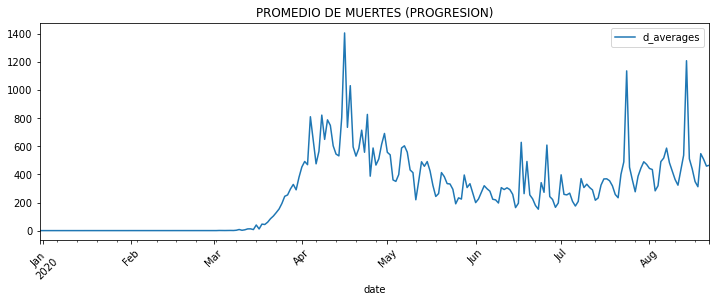

In [18]:
h.plot(figsize=(12,4))
plt.xticks(rotation=45)
plt.title("PROMEDIO DE MUERTES (PROGRESION)")



In [19]:
n_d=df1.pivot_table('new_deaths', index='date',columns='location')
n_d=n_d.fillna(0)
n_d

location    France   India   Peru  Spain  United States
date                                                   
2019-12-31     0.0     0.0    0.0    0.0            0.0
2020-01-01     0.0     0.0    0.0    0.0            0.0
2020-01-02     0.0     0.0    0.0    0.0            0.0
2020-01-03     0.0     0.0    0.0    0.0            0.0
2020-01-04     0.0     0.0    0.0    0.0            0.0
...            ...     ...    ...    ...            ...
2020-08-18    19.0   876.0  200.0   24.0          445.0
2020-08-19    22.0  1092.0  177.0  127.0         1324.0
2020-08-20    17.0   977.0  176.0   16.0         1356.0
2020-08-21    12.0   983.0  200.0   25.0         1078.0
2020-08-22    23.0   945.0  211.0    0.0         1151.0

[236 rows x 5 columns]

In [20]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON TOTAL DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$
    #*Total de casos en los 5 paises seleccionados. Datos que se van actualizando por día a la fecha actual
    #*Total de casos durante el perido de cuarentena en Francia
    #*Total de casos durante el perido de cuarentena en India
    #*Total de casos durante el perido de cuarentena en Perú
    #*Total de casos durante el perido de cuarentena en Spain
    #*Total de casos durante el perido de cuarentena en EEUU




In [21]:
t_c=df1.pivot_table('total_cases', index='date',columns='location') #El 21-01-20 EEUU tiene el primer caso. Francia lo tiene  el 25-01-20, India 30-01-20 y España 1-02-2020 luego solo podemos quitar fechas anteriores al 21-01-2020
t_c=t_c.fillna(0)
t_c

location      France      India      Peru     Spain  United States
date                                                              
2019-12-31       0.0        0.0       0.0       0.0            0.0
2020-01-01       0.0        0.0       0.0       0.0            0.0
2020-01-02       0.0        0.0       0.0       0.0            0.0
2020-01-03       0.0        0.0       0.0       0.0            0.0
2020-01-04       0.0        0.0       0.0       0.0            0.0
...              ...        ...       ...       ...            ...
2020-08-18  219029.0  2702742.0  541493.0  364196.0      5438325.0
2020-08-19  221267.0  2767273.0  549321.0  370867.0      5482416.0
2020-08-20  225043.0  2836925.0  558420.0  377906.0      5529842.0
2020-08-21  229814.0  2905823.0  567059.0  386054.0      5573847.0
2020-08-22  234400.0  2975701.0  576067.0       0.0      5623727.0

[236 rows x 5 columns]

In [22]:
t_c=t_c.loc[~(t_c==0).all(axis=1)] #Total de casos: Eliminamos las filas cuyos valores son 0 en todas sus columnas
t_c

location      France      India      Peru     Spain  United States
date                                                              
2020-01-21       0.0        0.0       0.0       0.0            1.0
2020-01-22       0.0        0.0       0.0       0.0            1.0
2020-01-23       0.0        0.0       0.0       0.0            1.0
2020-01-24       0.0        0.0       0.0       0.0            1.0
2020-01-25       3.0        0.0       0.0       0.0            2.0
...              ...        ...       ...       ...            ...
2020-08-18  219029.0  2702742.0  541493.0  364196.0      5438325.0
2020-08-19  221267.0  2767273.0  549321.0  370867.0      5482416.0
2020-08-20  225043.0  2836925.0  558420.0  377906.0      5529842.0
2020-08-21  229814.0  2905823.0  567059.0  386054.0      5573847.0
2020-08-22  234400.0  2975701.0  576067.0       0.0      5623727.0

[215 rows x 5 columns]

In [23]:
t_c=t_c.iloc[:-1,:] #España contabiliza más tarde sus datos y tengo que poner el día de ayer como ultimo para que no salga a 0
t_c

location      France      India      Peru     Spain  United States
date                                                              
2020-01-21       0.0        0.0       0.0       0.0            1.0
2020-01-22       0.0        0.0       0.0       0.0            1.0
2020-01-23       0.0        0.0       0.0       0.0            1.0
2020-01-24       0.0        0.0       0.0       0.0            1.0
2020-01-25       3.0        0.0       0.0       0.0            2.0
...              ...        ...       ...       ...            ...
2020-08-17  218536.0  2647663.0  535946.0  359082.0      5403269.0
2020-08-18  219029.0  2702742.0  541493.0  364196.0      5438325.0
2020-08-19  221267.0  2767273.0  549321.0  370867.0      5482416.0
2020-08-20  225043.0  2836925.0  558420.0  377906.0      5529842.0
2020-08-21  229814.0  2905823.0  567059.0  386054.0      5573847.0

[214 rows x 5 columns]

Text(0.5, 1.0, 'TOTAL DE CASOS POR PAIS (PROGRESION)')

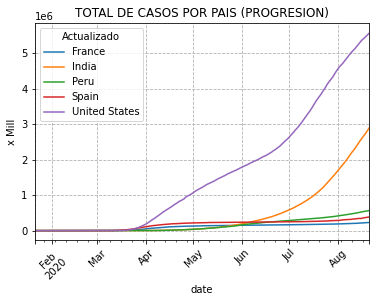

In [24]:
t_c.plot()
plt.legend(title="Actualizado")
plt.xticks(rotation=45)
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')
plt.title("TOTAL DE CASOS POR PAIS (PROGRESION)")
 #Gráfica tendencia totales de los 6 paises casos por fechas

In [25]:
total_cas=t_c.iloc[-1,:]
total_cas
#Total de casos acumulados por pais

location
France            229814.0
India            2905823.0
Peru              567059.0
Spain             386054.0
United States    5573847.0
Name: 2020-08-21 00:00:00, dtype: float64

In [26]:
total_cas=total_cas.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL DE CASOS POR PAIS / VALORES')

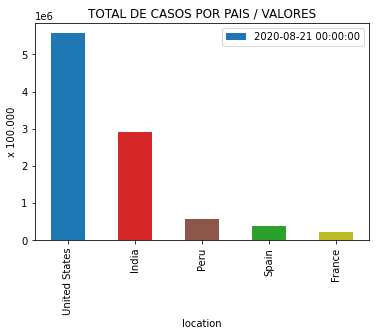

In [27]:

colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
total_cas.plot(kind='bar', color=colores_paises)
plt.legend()
plt.ylabel("x 100.000")
plt.title("TOTAL DE CASOS POR PAIS / VALORES") #Gráfica total casos por pais.(Responde a la pregunta bloque c numero 7 apartado a)

In [28]:
t_c_france=t_c.loc["2020-03-23":"2020-07-24","France"] #periodo del estado de emergencia en Francia
t_c_france

date
2020-03-23     16018.0
2020-03-24     19856.0
2020-03-25     22302.0
2020-03-26     25233.0
2020-03-27     29155.0
                ...   
2020-07-20    174674.0
2020-07-21    176754.0
2020-07-22    177338.0
2020-07-23    178336.0
2020-07-24    179398.0
Name: France, Length: 124, dtype: float64

Text(0.5, 1.0, 'TOTAL CASOS FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA')

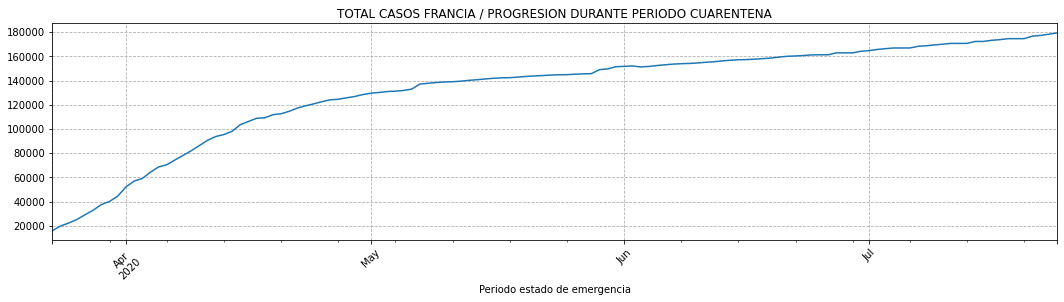

In [29]:
plt.figure(figsize=(18,4))
t_c_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.grid(linestyle ='dashed')
plt.title("TOTAL CASOS FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA")


In [30]:
t_c_india=t_c.loc[:,"India"] 
t_c_india

date
2020-01-21          0.0
2020-01-22          0.0
2020-01-23          0.0
2020-01-24          0.0
2020-01-25          0.0
                ...    
2020-08-17    2647663.0
2020-08-18    2702742.0
2020-08-19    2767273.0
2020-08-20    2836925.0
2020-08-21    2905823.0
Name: India, Length: 214, dtype: float64

In [31]:
t_c_india=t_c_india[63::]
t_c_india
 #periodo del estado de emergencia en India

date
2020-03-24        492.0
2020-03-25        562.0
2020-03-26        649.0
2020-03-27        724.0
2020-03-28        873.0
                ...    
2020-08-17    2647663.0
2020-08-18    2702742.0
2020-08-19    2767273.0
2020-08-20    2836925.0
2020-08-21    2905823.0
Name: India, Length: 151, dtype: float64

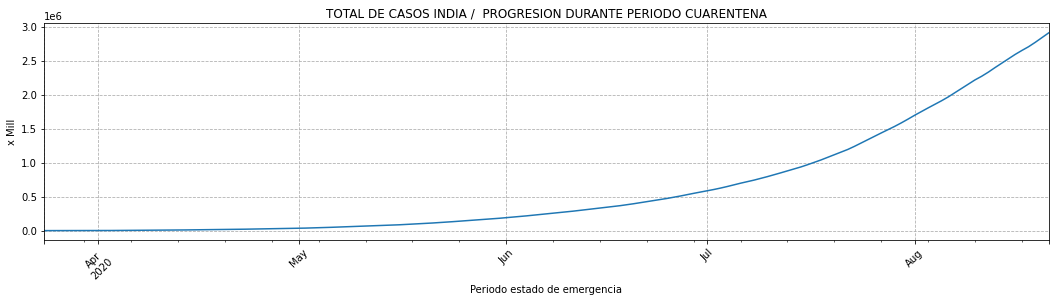

In [32]:
plt.figure(figsize=(18,4))
t_c_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS INDIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')


In [33]:
t_c_peru=t_c.loc[:,"Peru"] 
t_c_peru

date
2020-01-21         0.0
2020-01-22         0.0
2020-01-23         0.0
2020-01-24         0.0
2020-01-25         0.0
                ...   
2020-08-17    535946.0
2020-08-18    541493.0
2020-08-19    549321.0
2020-08-20    558420.0
2020-08-21    567059.0
Name: Peru, Length: 214, dtype: float64

In [34]:
t_c_peru=t_c_peru[55::]
t_c_peru
#periodo del estado de emergencia en Peru

date
2020-03-16        71.0
2020-03-17        86.0
2020-03-18       117.0
2020-03-19       145.0
2020-03-20       234.0
                ...   
2020-08-17    535946.0
2020-08-18    541493.0
2020-08-19    549321.0
2020-08-20    558420.0
2020-08-21    567059.0
Name: Peru, Length: 159, dtype: float64

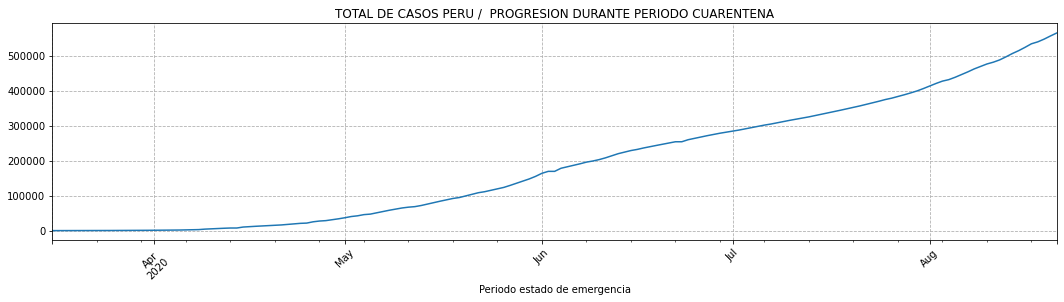

In [35]:
plt.figure(figsize=(18,4))
t_c_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS PERU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [36]:
t_c_spain=t_c.loc["2020-03-14":"2020-06-21","Spain"] #periodo del estado de emergencia en Spain
t_c_spain

date
2020-03-14      7641.0
2020-03-15      9785.0
2020-03-16     11491.0
2020-03-17     13994.0
2020-03-18     17688.0
                ...   
2020-06-17    244683.0
2020-06-18    245268.0
2020-06-19    245575.0
2020-06-20    245938.0
2020-06-21    246272.0
Name: Spain, Length: 100, dtype: float64

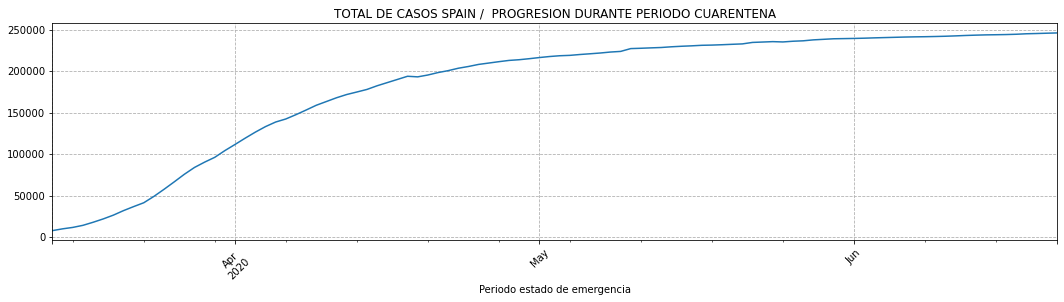

In [37]:
plt.figure(figsize=(18,4))
t_c_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS SPAIN /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [38]:
t_c_eeuu=t_c.loc["2020-03-13":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_c_eeuu

date
2020-03-13       1663.0
2020-03-14       2174.0
2020-03-15       2951.0
2020-03-16       3774.0
2020-03-17       4661.0
                ...    
2020-07-27    4234020.0
2020-07-28    4290263.0
2020-07-29    4351997.0
2020-07-30    4426982.0
2020-07-31    4495014.0
Name: United States, Length: 141, dtype: float64

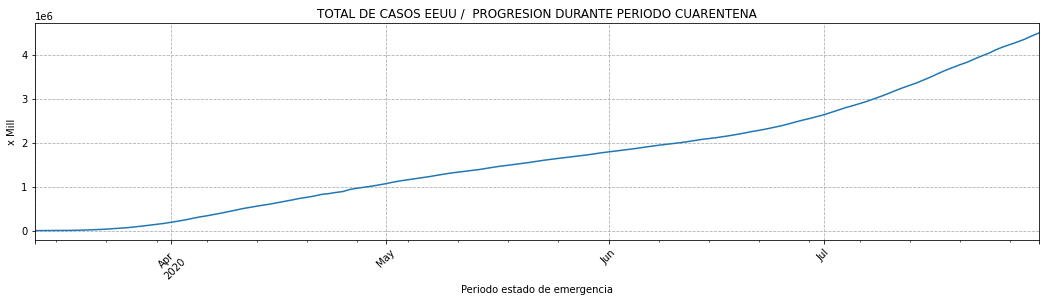

In [39]:
plt.figure(figsize=(18,4))
t_c_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS EEUU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')



In [40]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON NUEVOS DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

    #*nuevos casos por día de Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*nuevos casos durante el perido de cuarentena en Francia
    #*nuevos casos durante el perido de cuarentena en India
    #*nuevos casos durante el perido de cuarentena en Perú
    #*nuevos casos durante el perido de cuarentena en Spain
    #*nuevos casos durante el perido de cuarentena en EEUU

In [41]:
n_c=df1.pivot_table('new_cases', index='date',columns='location')
n_c=n_c.fillna(0)


In [42]:
n_c=n_c.loc[~(n_c==0).all(axis=1)]
n_c
#Nuevos casos: Eliminamos las filas cuyos valores son 0 en todas sus columnas

location    France    India    Peru   Spain  United States
date                                                      
2020-01-21     0.0      0.0     0.0     0.0            1.0
2020-01-25     3.0      0.0     0.0     0.0            1.0
2020-01-27     0.0      0.0     0.0     0.0            3.0
2020-01-29     1.0      0.0     0.0     0.0            0.0
2020-01-30     1.0      1.0     0.0     0.0            0.0
...            ...      ...     ...     ...            ...
2020-08-18   493.0  55079.0  5547.0  5114.0        35056.0
2020-08-19  2238.0  64531.0  7828.0  6671.0        44091.0
2020-08-20  3776.0  69652.0  9099.0  7039.0        47426.0
2020-08-21  4771.0  68898.0  8639.0  8148.0        44005.0
2020-08-22  4586.0  69878.0  9008.0     0.0        49880.0

[199 rows x 5 columns]

<function matplotlib.pyplot.show(*args, **kw)>

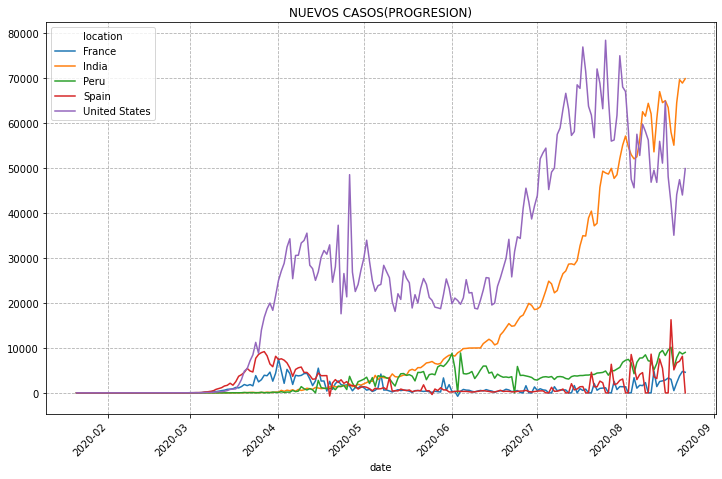

In [43]:
from matplotlib import pyplot
n_c.plot(figsize=(12,8))
plt.xticks(rotation=45)
plt.title("NUEVOS CASOS(PROGRESION)")
plt.grid(linestyle ='dashed')
plt.show
#Gráfica tendencia nuevos casos por fechas

In [44]:
total_n_cas=n_c.sum() 
total_n_cas

location
France            234400.0
India            2975701.0
Peru              576067.0
Spain             386054.0
United States    5623727.0
dtype: float64

In [45]:
total_n_cas=total_n_cas.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL NUEVOS CASOS')

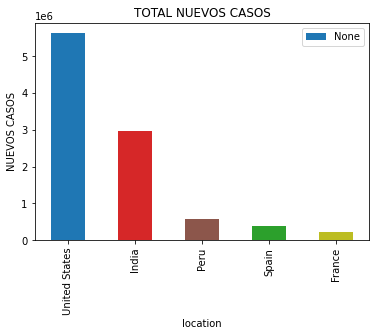

In [46]:
total_n_cas.plot(kind='bar',color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("NUEVOS CASOS")
plt.title("TOTAL NUEVOS CASOS")  #Gráfica total nuevos casos valores acumulados a dia actual.

<function matplotlib.pyplot.show(*args, **kw)>

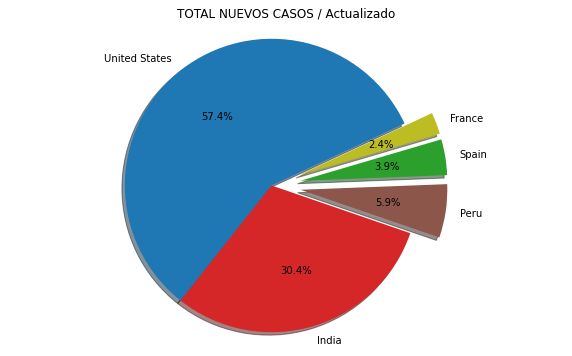

In [47]:

plt.figure(figsize=(10,6))
pais=("United States","India ","Peru ","Spain","France")
nuevos_casos=total_n_cas
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
plt.pie(nuevos_casos,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
plt.axis("equal")
plt.title("TOTAL NUEVOS CASOS / Actualizado")
plt.show

In [48]:
t_n_france=n_c.loc["2020-03-23":"2020-07-24","France"] #periodo del estado de emergencia en Francia
t_n_france

date
2020-03-23    1559.0
2020-03-24    3838.0
2020-03-25    2446.0
2020-03-26    2931.0
2020-03-27    3922.0
               ...  
2020-07-20       0.0
2020-07-21    2080.0
2020-07-22     584.0
2020-07-23     998.0
2020-07-24    1062.0
Name: France, Length: 124, dtype: float64

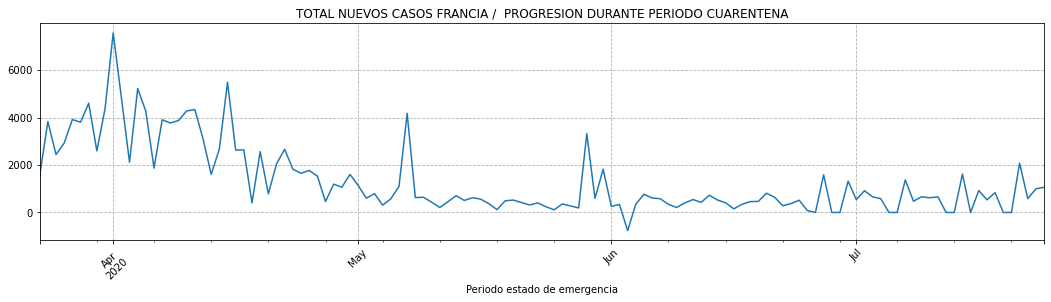

In [49]:
plt.figure(figsize=(18,4))
t_n_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS FRANCIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [50]:
t_n_india=n_c.loc[:,"India"] 
t_n_india

date
2020-01-21        0.0
2020-01-25        0.0
2020-01-27        0.0
2020-01-29        0.0
2020-01-30        1.0
               ...   
2020-08-18    55079.0
2020-08-19    64531.0
2020-08-20    69652.0
2020-08-21    68898.0
2020-08-22    69878.0
Name: India, Length: 199, dtype: float64

In [51]:

t_n_india=t_n_india[47::]
t_n_india
#periodo del estado de emergencia en India

date
2020-03-24       53.0
2020-03-25       70.0
2020-03-26       87.0
2020-03-27       75.0
2020-03-28      149.0
               ...   
2020-08-18    55079.0
2020-08-19    64531.0
2020-08-20    69652.0
2020-08-21    68898.0
2020-08-22    69878.0
Name: India, Length: 152, dtype: float64

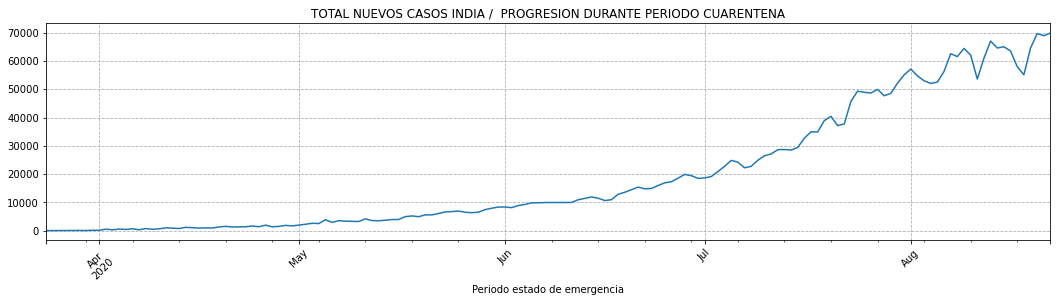

In [52]:
plt.figure(figsize=(18,4))
t_n_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS INDIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [53]:
t_n_peru=n_c.loc[:,"Peru"] 
t_n_peru

date
2020-01-21       0.0
2020-01-25       0.0
2020-01-27       0.0
2020-01-29       0.0
2020-01-30       0.0
               ...  
2020-08-18    5547.0
2020-08-19    7828.0
2020-08-20    9099.0
2020-08-21    8639.0
2020-08-22    9008.0
Name: Peru, Length: 199, dtype: float64

In [54]:
 #periodo del estado de emergencia en Peru
t_n_peru=t_n_peru[39::]
t_n_peru

date
2020-03-16      28.0
2020-03-17      15.0
2020-03-18      31.0
2020-03-19      28.0
2020-03-20      89.0
               ...  
2020-08-18    5547.0
2020-08-19    7828.0
2020-08-20    9099.0
2020-08-21    8639.0
2020-08-22    9008.0
Name: Peru, Length: 160, dtype: float64

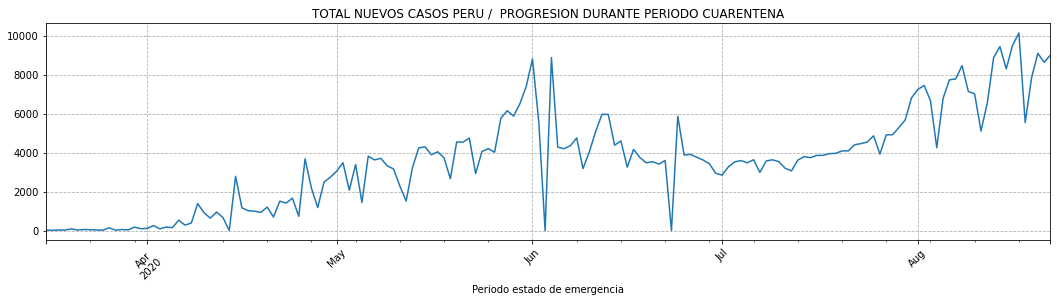

In [55]:
plt.figure(figsize=(18,4))
t_n_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS PERU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [56]:
Q1=n_c.quantile(0.25)
Q3=n_c.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France            1510.0
India            21487.0
Peru              4257.0
Spain             2791.0
United States    29276.0
dtype: float64


In [57]:
n_c.shape

(199, 5)

In [58]:
out1=n_c[((n_c< (Q1-1.5*IQR))|(n_c>(Q3 + 2*IQR))).any(axis=1)]

In [59]:
# @joseMaria 
# JMGONB
#$$$$ Se aprecia que Perú tiene picos de hasta más de 8000 casos nuevos pero que concentra en el perido los valores entre 1500 y 4000 casos diarios.

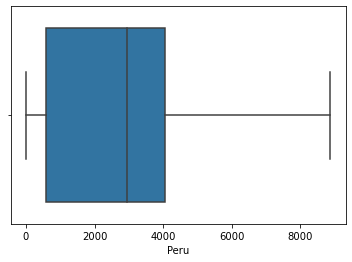

In [60]:
sns.boxplot(x=n_c.loc["2020-03-16":"2020-06-30","Peru"])

In [61]:
t_n_spain=n_c.loc["2020-03-14":"2020-06-21","Spain"] #periodo del estado de emergencia en Spain, aqui tenemos otro dato sospechoso de -372 nuevos casos.
t_n_spain

date
2020-03-14    1683.0
2020-03-15    2144.0
2020-03-16    1706.0
2020-03-17    2503.0
2020-03-18    3694.0
               ...  
2020-06-17     355.0
2020-06-18     585.0
2020-06-19     307.0
2020-06-20     363.0
2020-06-21     334.0
Name: Spain, Length: 100, dtype: float64

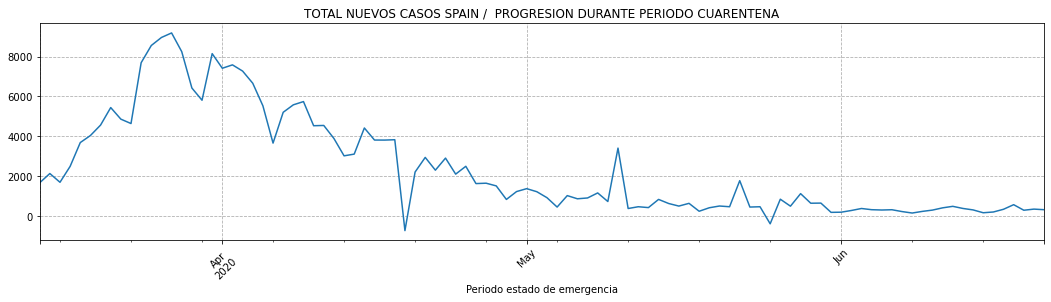

In [62]:
plt.figure(figsize=(18,4))
t_n_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS SPAIN /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')                   
#vemos que se han quitado contagiados

In [63]:
t_n_eeuu=n_c.loc["2020-03-13":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_n_eeuu

date
2020-03-13      351.0
2020-03-14      511.0
2020-03-15      777.0
2020-03-16      823.0
2020-03-17      887.0
               ...   
2020-07-27    55993.0
2020-07-28    56243.0
2020-07-29    61734.0
2020-07-30    74985.0
2020-07-31    68032.0
Name: United States, Length: 141, dtype: float64

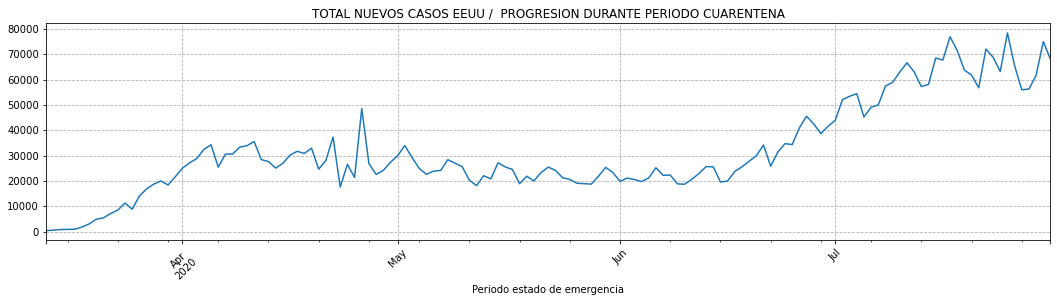

In [64]:
plt.figure(figsize=(18,4))
t_n_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS EEUU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [65]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON MUERTES TOTALES COVID 19$$$$$$$$$$$$$$$$$$$$$$$

    #*Total de muertes  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*Total de muertes durante el perido de cuarentena en Francia
    #*Total de muertes durante el perido de cuarentena en India
    #*Total de muertes durante el perido de cuarentena en Perú
    #*Total de muertes durante el perido de cuarentena en Spain
    #*Total de muertes durante el perido de cuarentena en EEUU
    #*Total muertos durante los periodos de cuarentena de los 5 paises en una mismo plot.

In [66]:
t_d=df1.pivot_table('total_deaths', index='date',columns='location')
t_d=t_d.fillna(0)


In [67]:
t_d=t_d.loc[~(t_d==0).all(axis=1)]
t_d
#Total de muertes:Eliminamos las filas cuyos valores son 0 en todas sus columnas

location     France    India     Peru    Spain  United States
date                                                         
2020-02-15      1.0      0.0      0.0      0.0            0.0
2020-02-16      1.0      0.0      0.0      0.0            0.0
2020-02-17      1.0      0.0      0.0      0.0            0.0
2020-02-18      1.0      0.0      0.0      0.0            0.0
2020-02-19      1.0      0.0      0.0      0.0            0.0
...             ...      ...      ...      ...            ...
2020-08-18  30429.0  51797.0  26481.0  28670.0       170497.0
2020-08-19  30451.0  52889.0  26658.0  28797.0       171821.0
2020-08-20  30468.0  53866.0  26834.0  28813.0       173177.0
2020-08-21  30480.0  54849.0  27034.0  28838.0       174255.0
2020-08-22  30503.0  55794.0  27245.0      0.0       175406.0

[190 rows x 5 columns]

In [68]:
t_d=t_d.iloc[:-1,:]  #En este caso tomo la penultima posición porque España actualiza la lista un día más tarde y uso tomar datos por posición porque españa pone y quita muertos.
t_d

location     France    India     Peru    Spain  United States
date                                                         
2020-02-15      1.0      0.0      0.0      0.0            0.0
2020-02-16      1.0      0.0      0.0      0.0            0.0
2020-02-17      1.0      0.0      0.0      0.0            0.0
2020-02-18      1.0      0.0      0.0      0.0            0.0
2020-02-19      1.0      0.0      0.0      0.0            0.0
...             ...      ...      ...      ...            ...
2020-08-17  30410.0  50921.0  26281.0  28646.0       170052.0
2020-08-18  30429.0  51797.0  26481.0  28670.0       170497.0
2020-08-19  30451.0  52889.0  26658.0  28797.0       171821.0
2020-08-20  30468.0  53866.0  26834.0  28813.0       173177.0
2020-08-21  30480.0  54849.0  27034.0  28838.0       174255.0

[189 rows x 5 columns]

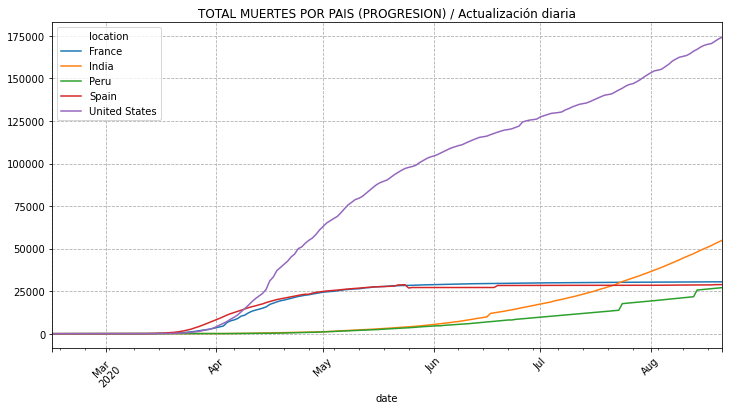

In [69]:
t_d.plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("TOTAL MUERTES POR PAIS (PROGRESION) / Actualización diaria")
plt.grid(linestyle ='dashed')  #Gráfica tendencia total muertes por fechas

In [70]:
total_dead=t_d.iloc[-1,:]
total_dead

location
France            30480.0
India             54849.0
Peru              27034.0
Spain             28838.0
United States    174255.0
Name: 2020-08-21 00:00:00, dtype: float64

In [71]:
total_dead=total_dead.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL MUERTES POR PAIS (Actualización diaria)')

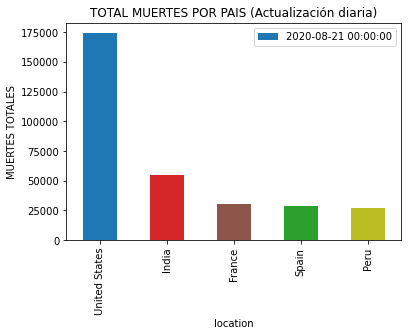

In [72]:
total_dead.plot(kind='bar',color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("MUERTES TOTALES")
plt.title("TOTAL MUERTES POR PAIS (Actualización diaria)") #Gráfica total muertes casos por pais.(Responde a la pregunta bloque c numero 7 apartado b)

<function matplotlib.pyplot.show(*args, **kw)>

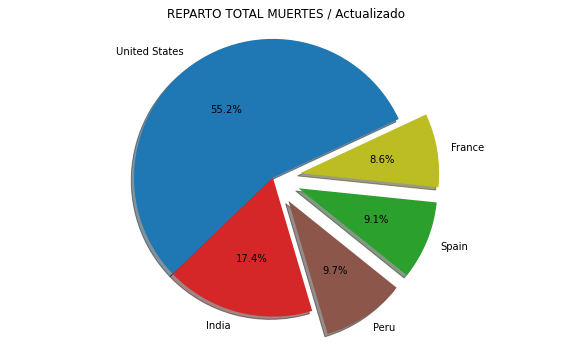

In [73]:
plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
muertes=total_dead
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(muertes,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO TOTAL MUERTES / Actualizado")
pyplot.show

In [74]:
t_d_france=t_d.loc["2020-03-23":"2020-07-24","France"] #periodo del estado de emergencia en Francia
t_d_france

date
2020-03-23      674.0
2020-03-24      860.0
2020-03-25     1100.0
2020-03-26     1331.0
2020-03-27     1696.0
               ...   
2020-07-20    30152.0
2020-07-21    30165.0
2020-07-22    30165.0
2020-07-23    30172.0
2020-07-24    30182.0
Name: France, Length: 124, dtype: float64

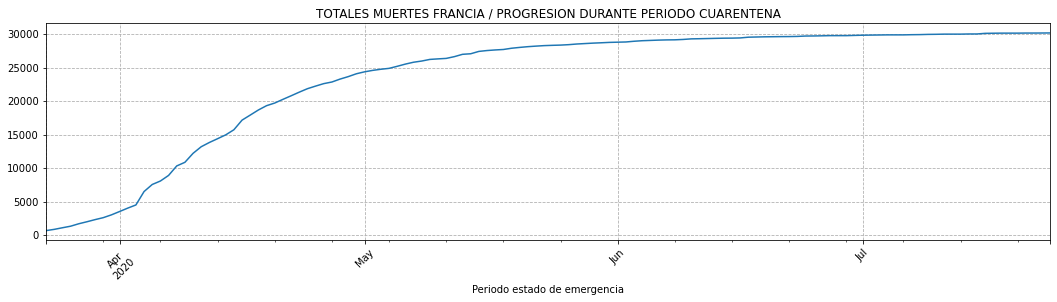

In [75]:
plt.figure(figsize=(18,4))
t_d_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTALES MUERTES FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [76]:
t_d_india=t_d.loc[:,"India"] 
t_d_india

date
2020-02-15        0.0
2020-02-16        0.0
2020-02-17        0.0
2020-02-18        0.0
2020-02-19        0.0
               ...   
2020-08-17    50921.0
2020-08-18    51797.0
2020-08-19    52889.0
2020-08-20    53866.0
2020-08-21    54849.0
Name: India, Length: 189, dtype: float64

In [77]:
t_d_india=t_d_india[38::]
t_d_india
#periodo del estado de emergencia en India

date
2020-03-24        9.0
2020-03-25        9.0
2020-03-26       13.0
2020-03-27       17.0
2020-03-28       19.0
               ...   
2020-08-17    50921.0
2020-08-18    51797.0
2020-08-19    52889.0
2020-08-20    53866.0
2020-08-21    54849.0
Name: India, Length: 151, dtype: float64

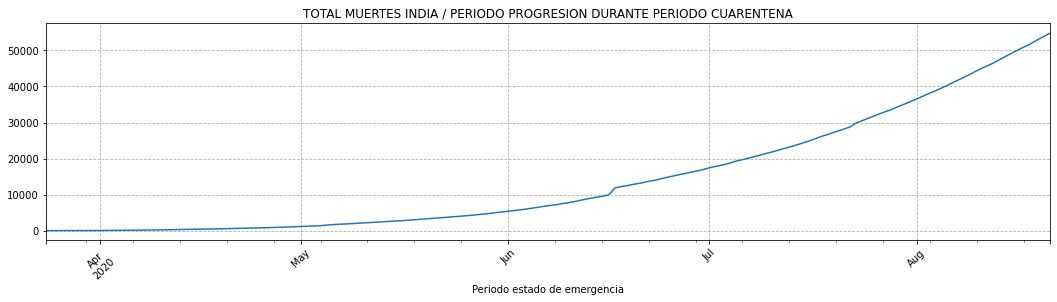

In [78]:
plt.figure(figsize=(18,4))
t_d_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES INDIA / PERIODO PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [79]:
t_d_peru=t_d.loc[:,"Peru"]
t_d_peru

date
2020-02-15        0.0
2020-02-16        0.0
2020-02-17        0.0
2020-02-18        0.0
2020-02-19        0.0
               ...   
2020-08-17    26281.0
2020-08-18    26481.0
2020-08-19    26658.0
2020-08-20    26834.0
2020-08-21    27034.0
Name: Peru, Length: 189, dtype: float64

In [80]:
t_d_peru=t_d_peru[30::]
t_d_peru
#periodo del estado de emergencia en Peru

date
2020-03-16        0.0
2020-03-17        0.0
2020-03-18        0.0
2020-03-19        0.0
2020-03-20        2.0
               ...   
2020-08-17    26281.0
2020-08-18    26481.0
2020-08-19    26658.0
2020-08-20    26834.0
2020-08-21    27034.0
Name: Peru, Length: 159, dtype: float64

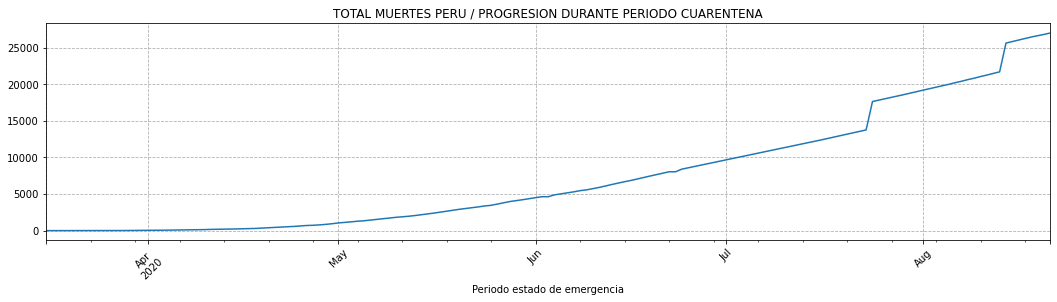

In [81]:
plt.figure(figsize=(18,4))
t_d_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES PERU / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [82]:
t_d_spain=t_d.loc["2020-03-14":"2020-06-21","Spain"] #periodo del estado de emergencia en Spain
t_d_spain

date
2020-03-14      121.0
2020-03-15      136.0
2020-03-16      288.0
2020-03-17      309.0
2020-03-18      491.0
               ...   
2020-06-17    27136.0
2020-06-18    27136.0
2020-06-19    28315.0
2020-06-20    28322.0
2020-06-21    28323.0
Name: Spain, Length: 100, dtype: float64

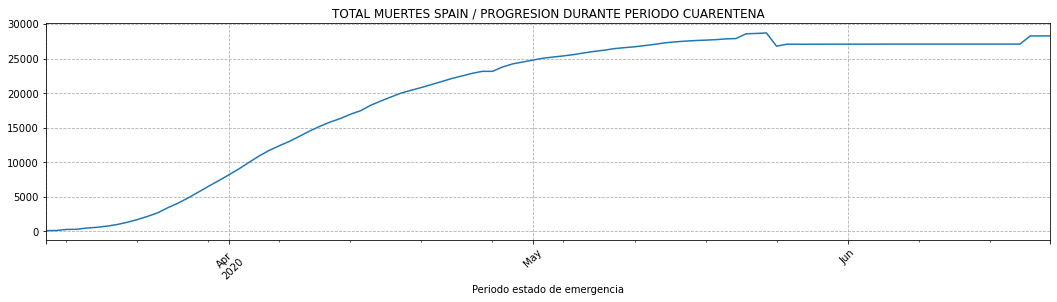

In [83]:
plt.figure(figsize=(18,4))
t_d_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES SPAIN / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [84]:
t_d_eeuu=t_d.loc["2020-03-13":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_d_eeuu

date
2020-03-13        40.0
2020-03-14        47.0
2020-03-15        57.0
2020-03-16        69.0
2020-03-17        85.0
                ...   
2020-07-27    146935.0
2020-07-28    148011.0
2020-07-29    149256.0
2020-07-30    150713.0
2020-07-31    152070.0
Name: United States, Length: 141, dtype: float64

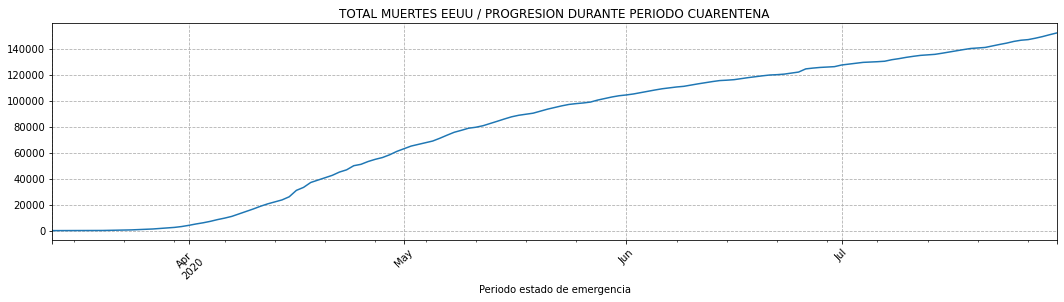

In [85]:
plt.figure(figsize=(18,4))
t_d_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES EEUU / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [86]:
dead1=pd.merge(t_d_france,t_d_peru,on='date',how='outer') #Con el objetivo de sacar los datos de muertos totales de los 5 paises en una misma gráfica y en una misma tabla, voy uniendo tablas porque tengo que unir de dos en dos hasta conseguir tener todo en una

In [87]:
dead2=pd.merge(t_d_india,t_d_spain,on='date',how='outer')

In [88]:
dead2.sort_values(["date"],ascending=True)

India  Spain
date                      
2020-03-14      NaN  121.0
2020-03-15      NaN  136.0
2020-03-16      NaN  288.0
2020-03-17      NaN  309.0
2020-03-18      NaN  491.0
...             ...    ...
2020-08-17  50921.0    NaN
2020-08-18  51797.0    NaN
2020-08-19  52889.0    NaN
2020-08-20  53866.0    NaN
2020-08-21  54849.0    NaN

[161 rows x 2 columns]

In [89]:
dead3=pd.merge(dead1,dead2,on='date',how='outer')

In [90]:
dead3.sort_values(["date"],ascending=True)

France     Peru    India  Spain
date                                       
2020-03-14     NaN      NaN      NaN  121.0
2020-03-15     NaN      NaN      NaN  136.0
2020-03-16     NaN      0.0      NaN  288.0
2020-03-17     NaN      0.0      NaN  309.0
2020-03-18     NaN      0.0      NaN  491.0
...            ...      ...      ...    ...
2020-08-17     NaN  26281.0  50921.0    NaN
2020-08-18     NaN  26481.0  51797.0    NaN
2020-08-19     NaN  26658.0  52889.0    NaN
2020-08-20     NaN  26834.0  53866.0    NaN
2020-08-21     NaN  27034.0  54849.0    NaN

[161 rows x 4 columns]

In [91]:
dead4=pd.merge(dead3,t_d_eeuu,on='date',how='outer')
dead4=dead4.fillna(0)

In [92]:
dead4.sort_values(["date"],ascending=True)

France     Peru    India  Spain  United States
date                                                      
2020-03-13     0.0      0.0      0.0    0.0           40.0
2020-03-14     0.0      0.0      0.0  121.0           47.0
2020-03-15     0.0      0.0      0.0  136.0           57.0
2020-03-16     0.0      0.0      0.0  288.0           69.0
2020-03-17     0.0      0.0      0.0  309.0           85.0
...            ...      ...      ...    ...            ...
2020-08-17     0.0  26281.0  50921.0    0.0            0.0
2020-08-18     0.0  26481.0  51797.0    0.0            0.0
2020-08-19     0.0  26658.0  52889.0    0.0            0.0
2020-08-20     0.0  26834.0  53866.0    0.0            0.0
2020-08-21     0.0  27034.0  54849.0    0.0            0.0

[162 rows x 5 columns]

In [93]:
dead5=dead4.max()
dead5    #Valores de la última contabilidad realizada en cada país al final de sus periodos de cuarentena

France            30182.0
Peru              27034.0
India             54849.0
Spain             28752.0
United States    152070.0
dtype: float64

In [94]:
dead5=dead5.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL MUERTES PERIODO CUARENTENAS ')

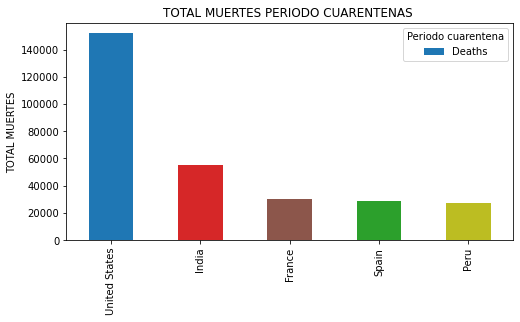

In [95]:
plt.figure(figsize=(8,4))
dead5.plot(kind='bar',color=colores_paises,label="Deaths")
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend(title="Periodo cuarentena" )
plt.ylabel("TOTAL MUERTES")
plt.title("TOTAL MUERTES PERIODO CUARENTENAS ")
#GRAFICA DE MUERTES contabilizadas DURANTE EL PERIODO DE CUARETENAS DE LOS PAISES.  LA TABLA RESUME LO QUE OCURRIO EN CADA PAIs

In [96]:
n_d=df1.pivot_table('new_deaths', index='date',columns='location')
n_d=n_d.fillna(0)


In [97]:
  # @joseMaria 
  # JMGONB
  
   #$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON NUEVAS MUERTES COVID 19$$$$$$$$$$$$$$$$$$$$$$$
   
    #*nuevas muertes por día  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*nuevas muertes durante el perido de cuarentena en Francia
    #*nuevas muertes durante el perido de cuarentena en India
    #*nuevas muertes durante el perido de cuarentena en Perú
    #*nuevas muertes durante el perido de cuarentena en Spain
    #*nuevas muertes durante el perido de cuarentena en EEUU
    #*nuevas muertes durante los periodos de cuarentena de los 5 paises en una mismo plot.

In [98]:
n_d=n_d.loc[~(h==0).all(axis=1)]
n_d
#Nuevas muertes: Eliminamos las filas cuyos valores son 0 en todas sus columnas

location    France   India   Peru  Spain  United States
date                                                   
2020-02-15     1.0     0.0    0.0    0.0            0.0
2020-02-27     1.0     0.0    0.0    0.0            0.0
2020-03-01     0.0     0.0    0.0    0.0            1.0
2020-03-02     0.0     0.0    0.0    0.0            1.0
2020-03-03     1.0     0.0    0.0    0.0            4.0
...            ...     ...    ...    ...            ...
2020-08-18    19.0   876.0  200.0   24.0          445.0
2020-08-19    22.0  1092.0  177.0  127.0         1324.0
2020-08-20    17.0   977.0  176.0   16.0         1356.0
2020-08-21    12.0   983.0  200.0   25.0         1078.0
2020-08-22    23.0   945.0  211.0    0.0         1151.0

[177 rows x 5 columns]

In [99]:
n_d

location    France   India   Peru  Spain  United States
date                                                   
2020-02-15     1.0     0.0    0.0    0.0            0.0
2020-02-27     1.0     0.0    0.0    0.0            0.0
2020-03-01     0.0     0.0    0.0    0.0            1.0
2020-03-02     0.0     0.0    0.0    0.0            1.0
2020-03-03     1.0     0.0    0.0    0.0            4.0
...            ...     ...    ...    ...            ...
2020-08-18    19.0   876.0  200.0   24.0          445.0
2020-08-19    22.0  1092.0  177.0  127.0         1324.0
2020-08-20    17.0   977.0  176.0   16.0         1356.0
2020-08-21    12.0   983.0  200.0   25.0         1078.0
2020-08-22    23.0   945.0  211.0    0.0         1151.0

[177 rows x 5 columns]

In [100]:
n_d.loc["2020-05-18":"2020-05-30","Spain"]  #outlier Spain

date
2020-05-18      59.0
2020-05-19      69.0
2020-05-20     110.0
2020-05-21      52.0
2020-05-22     688.0
2020-05-23      50.0
2020-05-24      74.0
2020-05-25   -1918.0
2020-05-26     283.0
2020-05-27       1.0
2020-05-28       1.0
2020-05-29       2.0
2020-05-30       4.0
Name: Spain, dtype: float64

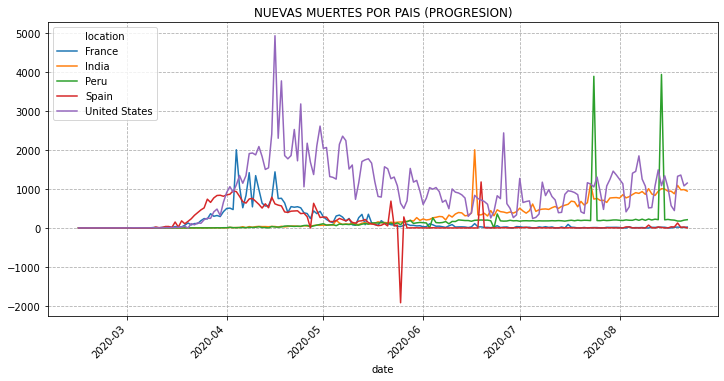

In [101]:
n_d.plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("NUEVAS MUERTES POR PAIS (PROGRESION)")
plt.grid(linestyle ='dashed')
 #Gráfica tendencia total nuevas  muertes por fechas, en el caso de España se aprecia dos outlier entre 22 y 25 de Mayo

In [102]:
n_d.index=pd.to_datetime(n_d.index)  

In [103]:
n_d_1=n_d.resample('M').sum() #agrupo por meses para mejor visualizacion 

In [104]:
n_d_1

location     France    India    Peru    Spain  United States
date                                                        
2020-02-29      2.0      0.0     0.0      0.0            0.0
2020-03-31   3022.0     32.0    24.0   7340.0         3170.0
2020-04-30  21063.0   1042.0   919.0  17203.0        57796.0
2020-05-31   4684.0   4090.0  3428.0   2584.0        42815.0
2020-06-30   1042.0  11729.0  5133.0   1228.0        22359.0
2020-07-31    441.0  18854.0  9517.0     90.0        25930.0
2020-08-31    249.0  20047.0  8224.0    393.0        23336.0

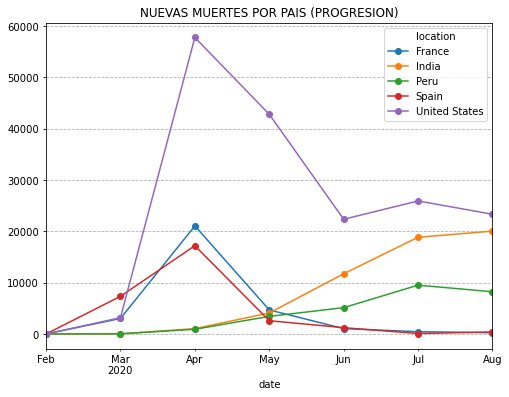

In [105]:
n_d_1.plot(figsize=(8,6),marker = 'o')
plt.xticks(rotation=45)
plt.title("NUEVAS MUERTES POR PAIS (PROGRESION)")
plt.grid(linestyle ='dashed')
#Esta gráfica representa los mismos valores que la gráfica anterior pero agrupados de mes en mes, es importante ver como se enmascaran los outlier de los días de mayo mecionados. Al tomar la gráfica el acumulado del més se diluyen.

In [106]:
total_new_dead=n_d.sum()
total_new_dead

location
France            30503.0
India             55794.0
Peru              27245.0
Spain             28838.0
United States    175406.0
dtype: float64

In [107]:
total_new_dead=total_new_dead.sort_values(ascending=False)

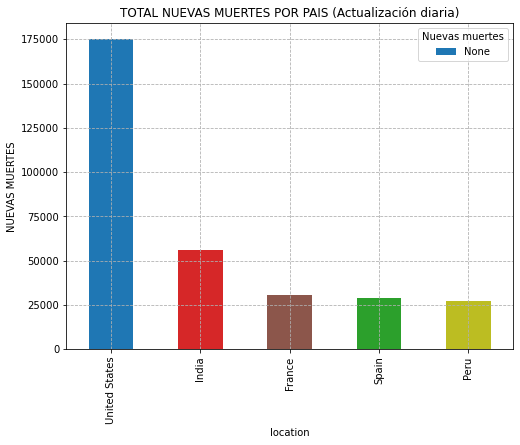

In [108]:
total_new_dead.plot(figsize=(8,6),kind='bar', color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend(title="Nuevas muertes" )
plt.ylabel("NUEVAS MUERTES")
plt.title("TOTAL NUEVAS MUERTES POR PAIS (Actualización diaria)")
plt.grid(linestyle = 'dashed')  #Gráfica total nuevas muertes valores acumulados a dia actual.


<function matplotlib.pyplot.show(*args, **kw)>

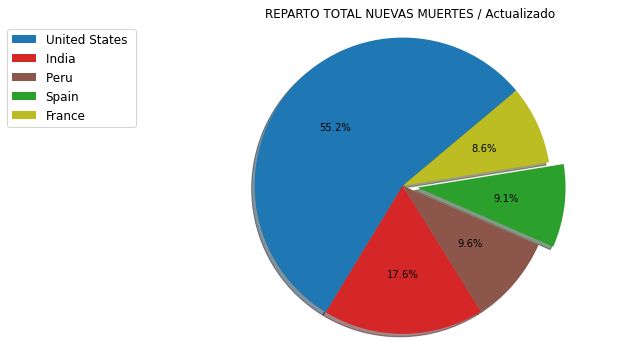

In [109]:

plt.figure(figsize=(8,6))
pais=("United States ","India ","Peru ","Spain","France")
nuevas_muertes=total_new_dead
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.0,0.1,0.0)
plt.pie(nuevas_muertes,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=40,explode=desfase)
plt.axis("equal")
plt.title("REPARTO TOTAL NUEVAS MUERTES / Actualizado")
plt.legend(nuevas_muertes, labels=pais, loc='left center', bbox_to_anchor=(-0.1, 1.),
              fontsize=12)
plt.show

In [110]:
n_d

location    France   India   Peru  Spain  United States
date                                                   
2020-02-15     1.0     0.0    0.0    0.0            0.0
2020-02-27     1.0     0.0    0.0    0.0            0.0
2020-03-01     0.0     0.0    0.0    0.0            1.0
2020-03-02     0.0     0.0    0.0    0.0            1.0
2020-03-03     1.0     0.0    0.0    0.0            4.0
...            ...     ...    ...    ...            ...
2020-08-18    19.0   876.0  200.0   24.0          445.0
2020-08-19    22.0  1092.0  177.0  127.0         1324.0
2020-08-20    17.0   977.0  176.0   16.0         1356.0
2020-08-21    12.0   983.0  200.0   25.0         1078.0
2020-08-22    23.0   945.0  211.0    0.0         1151.0

[177 rows x 5 columns]

In [111]:
n_d.index=pd.to_datetime(n_d.index) 

In [112]:
n_d_france=n_d.loc["2020-03-24":"2020-07-24","France"]
n_d_france
 #periodo del estado de emergencia en Francia

date
2020-03-24    186.0
2020-03-25    240.0
2020-03-26    231.0
2020-03-27    365.0
2020-03-28    299.0
              ...  
2020-07-20      0.0
2020-07-21     13.0
2020-07-22      0.0
2020-07-23      7.0
2020-07-24     10.0
Name: France, Length: 123, dtype: float64

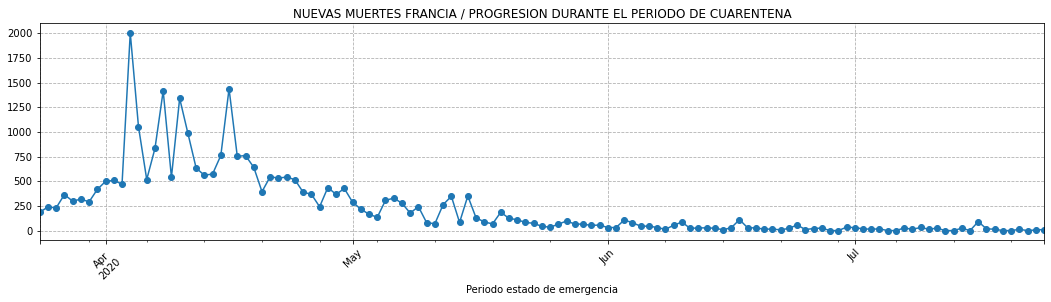

In [113]:
plt.figure(figsize=(18,4))
n_d_france.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES FRANCIA / PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [114]:
n_d_india=n_d.loc[:,"India"] 
n_d_india

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-18     876.0
2020-08-19    1092.0
2020-08-20     977.0
2020-08-21     983.0
2020-08-22     945.0
Name: India, Length: 177, dtype: float64

In [115]:
n_d_india=n_d_india[25::] #periodo del estado de emergencia en India
n_d_india

date
2020-03-24       2.0
2020-03-25       0.0
2020-03-26       4.0
2020-03-27       4.0
2020-03-28       2.0
               ...  
2020-08-18     876.0
2020-08-19    1092.0
2020-08-20     977.0
2020-08-21     983.0
2020-08-22     945.0
Name: India, Length: 152, dtype: float64

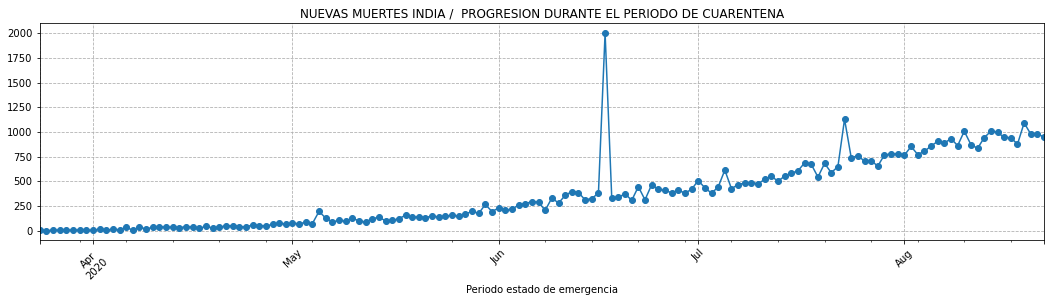

In [116]:
plt.figure(figsize=(18,4))
n_d_india.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES INDIA /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [117]:
n_d_peru=n_d.loc[:,"Peru"] 
n_d_peru



date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-18    200.0
2020-08-19    177.0
2020-08-20    176.0
2020-08-21    200.0
2020-08-22    211.0
Name: Peru, Length: 177, dtype: float64

In [118]:
n_d_peru=n_d_peru[17::]
n_d_peru
 #periodo del estado de emergencia en Peru

date
2020-03-16      0.0
2020-03-17      0.0
2020-03-18      0.0
2020-03-19      0.0
2020-03-20      2.0
              ...  
2020-08-18    200.0
2020-08-19    177.0
2020-08-20    176.0
2020-08-21    200.0
2020-08-22    211.0
Name: Peru, Length: 160, dtype: float64

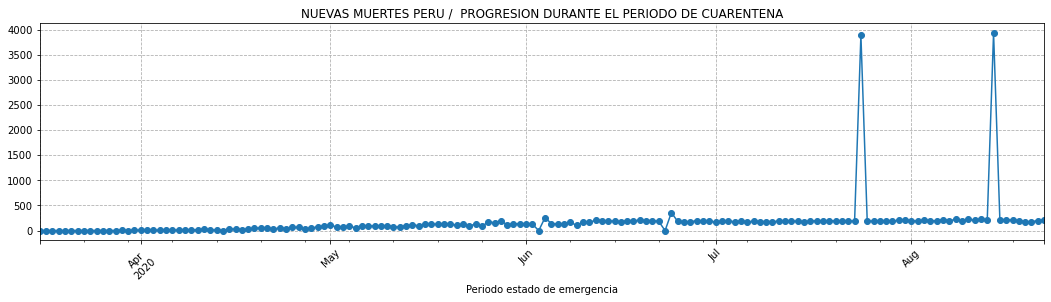

In [119]:
plt.figure(figsize=(18,4))
n_d_peru.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES PERU /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [120]:
n_d_spain=n_d.loc["2020-03-16":"2020-06-21","Spain"] #periodo del estado de emergencia en Spain
n_d_spain

date
2020-03-16     152.0
2020-03-17      21.0
2020-03-18     182.0
2020-03-19     107.0
2020-03-20     169.0
               ...  
2020-06-17       0.0
2020-06-18       0.0
2020-06-19    1179.0
2020-06-20       7.0
2020-06-21       1.0
Name: Spain, Length: 98, dtype: float64

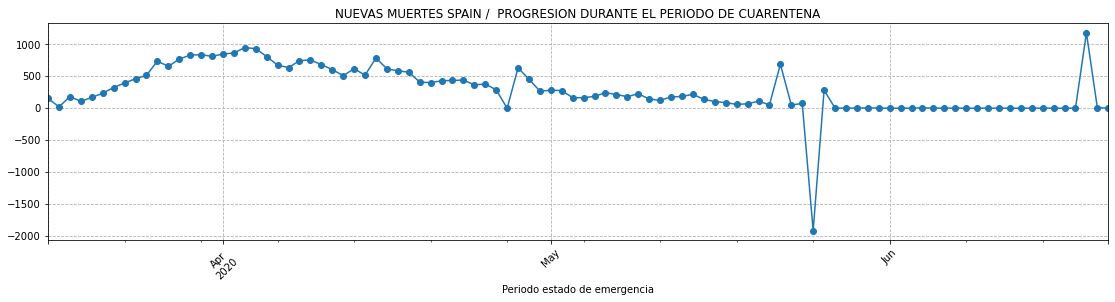

In [121]:
plt.figure(figsize=(19,4))
n_d_spain.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES SPAIN /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed') 
#El 25 de mayo los datos son negativos por un supuesto ajuste oficial al contabilizar=outlier

In [122]:
import seaborn as sns
Q1=n_d.quantile(0.25)
Q3=n_d.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France           218.0
India            474.0
Peru             175.0
Spain            243.0
United States    917.0
dtype: float64


In [123]:
Q1=n_d.quantile(0.25)
Q3=n_d.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France           218.0
India            474.0
Peru             175.0
Spain            243.0
United States    917.0
dtype: float64


In [124]:
#$$$$$ Plot con el outlier en la estadística de nuevos casos detectado el día 25-05-2020 cuando se restaron 1918 fallecidos.

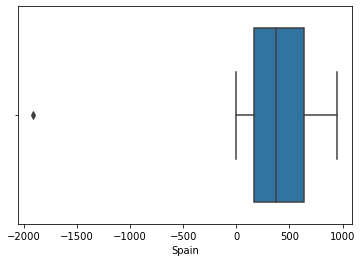

In [125]:
sns.boxplot(x=n_d.loc["2020-03-15":"2020-05-25","Spain"])  

In [126]:
n_d_eeuu=n_d.loc["2020-03-13":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
n_d_eeuu

date
2020-03-13      10.0
2020-03-14       7.0
2020-03-15      10.0
2020-03-16      12.0
2020-03-17      16.0
               ...  
2020-07-27     475.0
2020-07-28    1076.0
2020-07-29    1245.0
2020-07-30    1457.0
2020-07-31    1357.0
Name: United States, Length: 141, dtype: float64

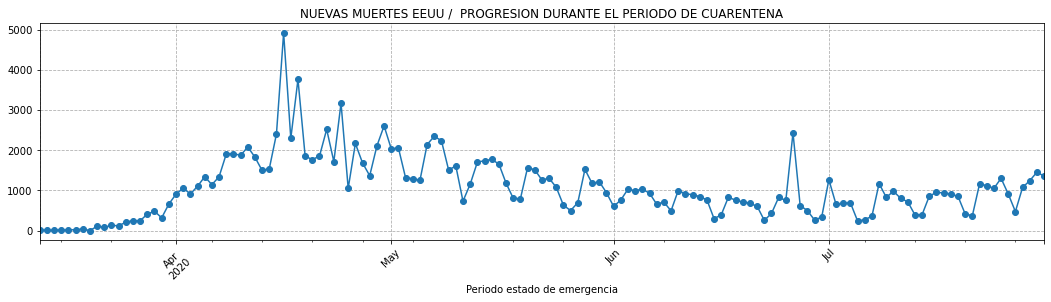

In [127]:
plt.figure(figsize=(18,4))
n_d_eeuu.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES EEUU /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle = 'dashed')


In [128]:
data=pd.merge(n_d_france,n_d_peru,on='date',how='outer')
data.sort_values(["date"],ascending=True)

France   Peru
date                     
2020-03-16     NaN    0.0
2020-03-17     NaN    0.0
2020-03-18     NaN    0.0
2020-03-19     NaN    0.0
2020-03-20     NaN    2.0
...            ...    ...
2020-08-18     NaN  200.0
2020-08-19     NaN  177.0
2020-08-20     NaN  176.0
2020-08-21     NaN  200.0
2020-08-22     NaN  211.0

[160 rows x 2 columns]

In [129]:
data2=pd.merge(n_d_india,n_d_spain,on='date',how='outer')
data2.sort_values(["date"],ascending=True)

India  Spain
date                     
2020-03-16     NaN  152.0
2020-03-17     NaN   21.0
2020-03-18     NaN  182.0
2020-03-19     NaN  107.0
2020-03-20     NaN  169.0
...            ...    ...
2020-08-18   876.0    NaN
2020-08-19  1092.0    NaN
2020-08-20   977.0    NaN
2020-08-21   983.0    NaN
2020-08-22   945.0    NaN

[160 rows x 2 columns]

In [130]:
data3=pd.merge(data,data2,on='date',how='outer')
data3.sort_values(["date"],ascending=True)

France   Peru   India  Spain
date                                    
2020-03-16     NaN    0.0     NaN  152.0
2020-03-17     NaN    0.0     NaN   21.0
2020-03-18     NaN    0.0     NaN  182.0
2020-03-19     NaN    0.0     NaN  107.0
2020-03-20     NaN    2.0     NaN  169.0
...            ...    ...     ...    ...
2020-08-18     NaN  200.0   876.0    NaN
2020-08-19     NaN  177.0  1092.0    NaN
2020-08-20     NaN  176.0   977.0    NaN
2020-08-21     NaN  200.0   983.0    NaN
2020-08-22     NaN  211.0   945.0    NaN

[160 rows x 4 columns]

In [131]:
data4=pd.merge(data3,n_d_eeuu,on='date',how='outer')
data4=data4.fillna(0)

In [132]:
data4=data4.sort_values(["date"],ascending=True)
data4

France   Peru   India  Spain  United States
date                                                   
2020-03-13     0.0    0.0     0.0    0.0           10.0
2020-03-14     0.0    0.0     0.0    0.0            7.0
2020-03-15     0.0    0.0     0.0    0.0           10.0
2020-03-16     0.0    0.0     0.0  152.0           12.0
2020-03-17     0.0    0.0     0.0   21.0           16.0
...            ...    ...     ...    ...            ...
2020-08-18     0.0  200.0   876.0    0.0            0.0
2020-08-19     0.0  177.0  1092.0    0.0            0.0
2020-08-20     0.0  176.0   977.0    0.0            0.0
2020-08-21     0.0  200.0   983.0    0.0            0.0
2020-08-22     0.0  211.0   945.0    0.0            0.0

[163 rows x 5 columns]

In [133]:
data5=data4.sum()
data5

France            29508.0
Peru              27245.0
India             55787.0
Spain             28187.0
United States    152040.0
dtype: float64

In [134]:
data5=data5.sort_values(ascending=False)

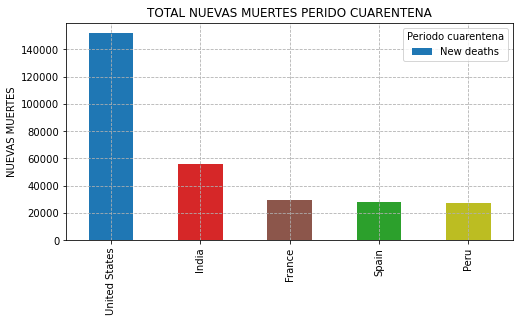

In [135]:
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.figure(figsize=(8,4))
data5.plot(kind='bar',color=colores_paises,label="New deaths")
plt.legend(title="Periodo cuarentena")
plt.ylabel("NUEVAS MUERTES")
plt.title("TOTAL NUEVAS MUERTES PERIDO CUARENTENA")
plt.grid(linestyle = 'dashed')

#GRAFICA DE NUEVAS MUERTES PRODUCIDAS DURANTE EL PERIODO DE CUARETENAS DE LOS PAISES. EN LA TABLA RESUME LO QUE OCURRIO EN CADA PAIS 


In [136]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON RECUPERACIONES DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

 #*Total de recuperaciones por día  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual

In [137]:
total_cas

location
United States    5573847.0
India            2905823.0
Peru              567059.0
Spain             386054.0
France            229814.0
Name: 2020-08-21 00:00:00, dtype: float64

In [138]:
total_dead

location
United States    174255.0
India             54849.0
France            30480.0
Spain             28838.0
Peru              27034.0
Name: 2020-08-21 00:00:00, dtype: float64

In [139]:
recuperados=total_cas-total_dead
recuperados

location
France            199334.0
India            2850974.0
Peru              540025.0
Spain             357216.0
United States    5399592.0
Name: 2020-08-21 00:00:00, dtype: float64

In [140]:
recuperados=recuperados.sort_values(ascending=False)

Text(0.5, 1.0, 'RECUPERACIONES TOTALES')

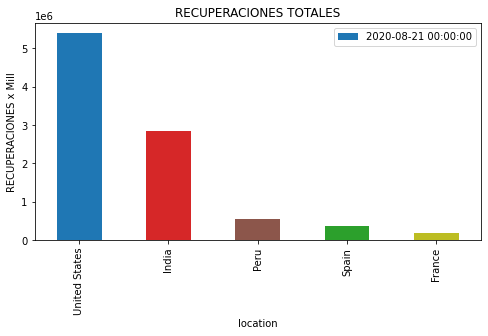

In [141]:
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.figure(figsize=(8,4))
recuperados.plot(kind='bar',color=colores_paises)
plt.legend(loc=2, fontsize = 'xx-small')
plt.legend()
plt.ylabel("RECUPERACIONES x Mill")
plt.title("RECUPERACIONES TOTALES")


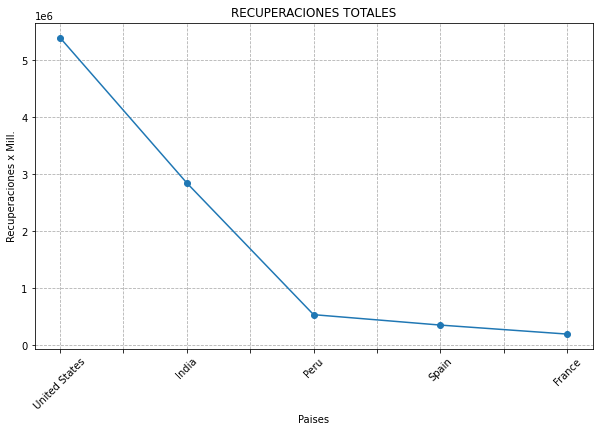

In [142]:
plt.figure(figsize=(10,6))
recuperados.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Paises")
plt.ylabel("Recuperaciones x Mill.")
plt.title("RECUPERACIONES TOTALES")
plt.grid(linestyle = 'dashed')

In [143]:
x=recuperados.sum()
x=int(x)
x


9347141

<function matplotlib.pyplot.show(*args, **kw)>

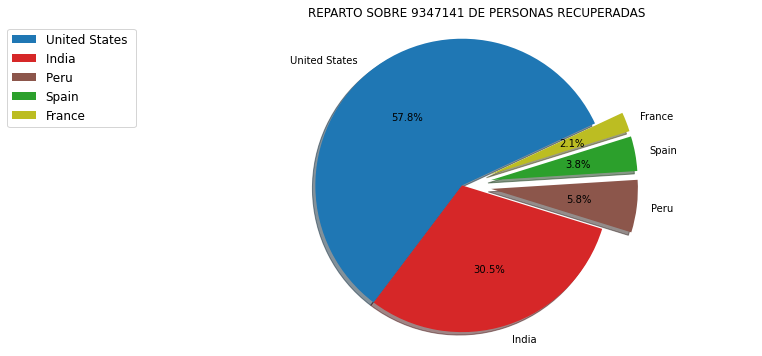

In [144]:

plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
recuperacion=recuperados
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
plt.pie(recuperacion,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
plt.axis("equal")
plt.title("REPARTO SOBRE "+str(x)+" DE PERSONAS RECUPERADAS")
plt.legend(recuperacion, labels=pais, loc='left center', bbox_to_anchor=(-0.1, 1.),
              fontsize=12)
pyplot.show

In [145]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS TOTAL CASOS VS TOTAL MUERTES EN LOS 5 PAISES $$$$$$$$$$$$$$$$$$$$$$$

 #*Total de casos actualizado y comparativa con total muertes. diagrama de barras con los 5 paises.

In [146]:
total_cas_total_dead=pd.merge(total_cas,total_dead,on='location',how='outer')
total_cas_total_dead=total_cas_total_dead.fillna(0)

In [147]:
total_cas_total_dead.columns=["Total casos","Total muertes"]

In [148]:
total_cas_total_dead

Total casos  Total muertes
location                                 
United States    5573847.0       174255.0
India            2905823.0        54849.0
Peru              567059.0        27034.0
Spain             386054.0        28838.0
France            229814.0        30480.0

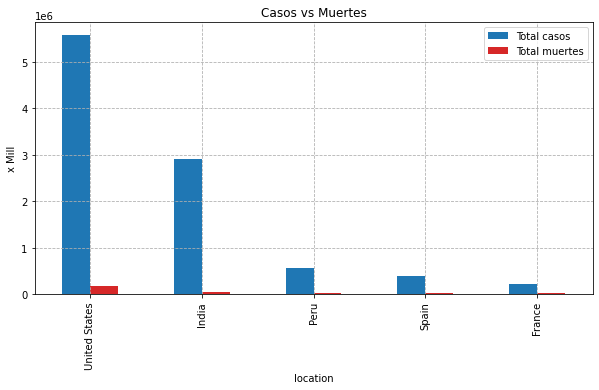

In [149]:
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
total_cas_total_dead.plot(figsize=(10,5),kind='bar',color=colores_paises)
plt.legend()
plt.grid(linestyle = 'dashed')
plt.ylabel("x Mill")
plt.title("Casos vs Muertes")
plt.show()

In [150]:
#$$$$ Diagrama dispersión relación infecciones con muertes en los cinco paises$$$$$

In [151]:
total_cas_total_dead

Total casos  Total muertes
location                                 
United States    5573847.0       174255.0
India            2905823.0        54849.0
Peru              567059.0        27034.0
Spain             386054.0        28838.0
France            229814.0        30480.0

<function matplotlib.pyplot.show(*args, **kw)>

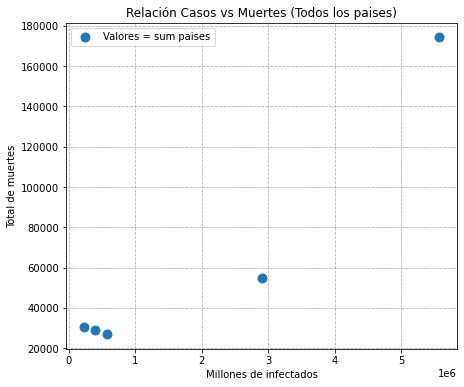

In [152]:
fig,ax=plt.subplots(figsize=(7,6))
my_scatter_plot=ax.scatter(total_cas_total_dead["Total casos"],total_cas_total_dead["Total muertes"],s=80, label="Valores = sum paises")
plt.grid(linestyle = 'dashed')
plt.ylabel("Total de muertes")
plt.xlabel("Millones de infectados")
plt.title("Relación Casos vs Muertes (Todos los paises)")
plt.legend()
plt.show

#Lo interpretamos que en el pais que ha tenido casi 5.000.000 de infectados se corresponde con casí 163.000 muertes

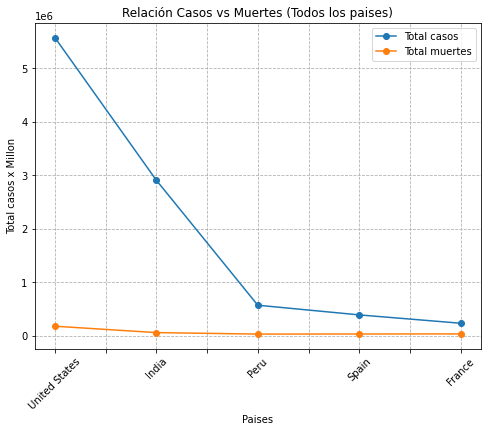

In [153]:
total_cas_total_dead.plot(marker = 'o',figsize=(8,6))
plt.xticks(rotation=45)
plt.xlabel("Paises")
plt.ylabel("Total casos x Millon")
plt.title("Relación Casos vs Muertes (Todos los paises)")
plt.grid(linestyle = 'dashed')

In [154]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS MOSTRANDO LINEAS VERTICALES QUE DELIMITAN PERIODOS DE CUARENTENAS $$$$$$$$$$$$$$$$$$$$$$$

In [155]:
fr=n_d.iloc[:,0]
fr

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-08-18    19.0
2020-08-19    22.0
2020-08-20    17.0
2020-08-21    12.0
2020-08-22    23.0
Name: France, Length: 177, dtype: float64

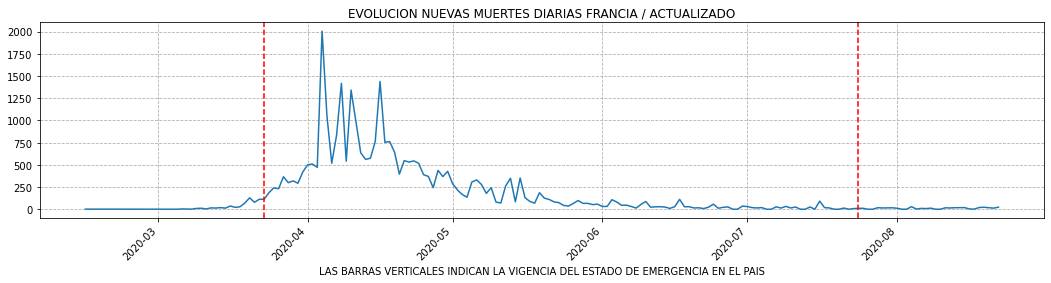

In [156]:
plt.figure(figsize=(18,4))
fr.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS FRANCIA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-23 ","2020-07-24 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [157]:
ind=n_d.iloc[:,1]
ind

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-18     876.0
2020-08-19    1092.0
2020-08-20     977.0
2020-08-21     983.0
2020-08-22     945.0
Name: India, Length: 177, dtype: float64

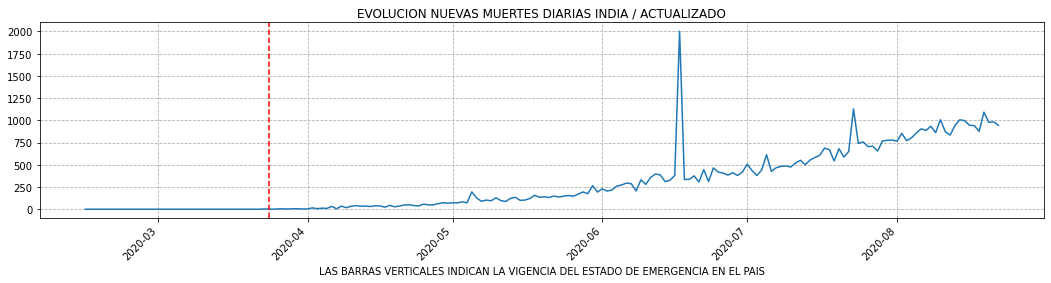

In [158]:
plt.figure(figsize=(18,4))
ind.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS INDIA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-24 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [159]:
per=n_d.iloc[:,2]
per

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-18    200.0
2020-08-19    177.0
2020-08-20    176.0
2020-08-21    200.0
2020-08-22    211.0
Name: Peru, Length: 177, dtype: float64

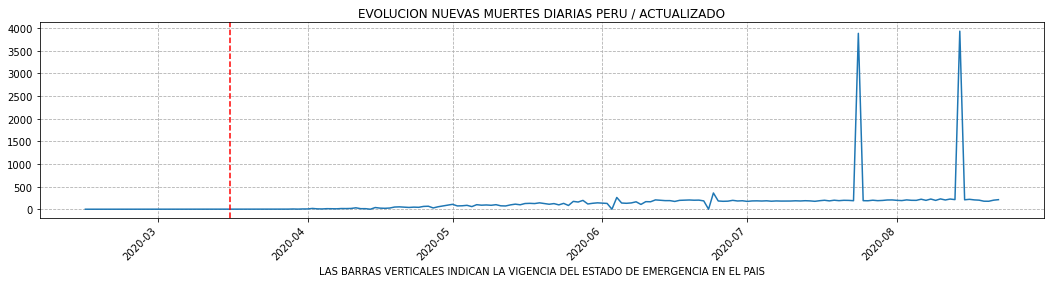

In [160]:
plt.figure(figsize=(18,4))
per.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS PERU / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-16 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [161]:
esp=n_d.iloc[:,3]
esp

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-18     24.0
2020-08-19    127.0
2020-08-20     16.0
2020-08-21     25.0
2020-08-22      0.0
Name: Spain, Length: 177, dtype: float64

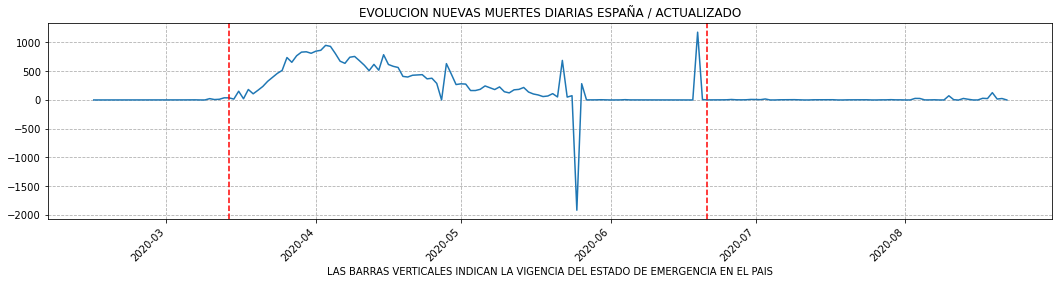

In [162]:
plt.figure(figsize=(18,4))
esp.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS ESPAÑA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-14 ","2020-06-21 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")


In [163]:
eu=n_d.iloc[:,4]
eu

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       1.0
2020-03-02       1.0
2020-03-03       4.0
               ...  
2020-08-18     445.0
2020-08-19    1324.0
2020-08-20    1356.0
2020-08-21    1078.0
2020-08-22    1151.0
Name: United States, Length: 177, dtype: float64

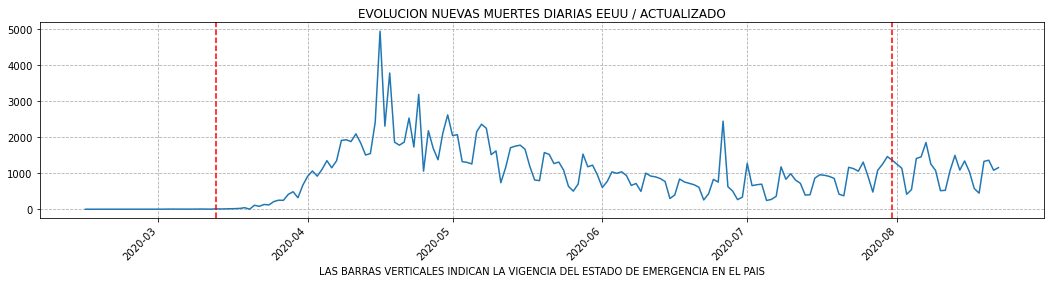

In [164]:
plt.figure(figsize=(18,4))
eu.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS EEUU / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-13 ","2020-07-31 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [165]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS DE PORCENTAJES DE MUERTES Y RECUPERADOS  VS CASOS TOTALES DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

In [166]:
porct_1=total_cas_total_dead

In [167]:
porct_1

Total casos  Total muertes
location                                 
United States    5573847.0       174255.0
India            2905823.0        54849.0
Peru              567059.0        27034.0
Spain             386054.0        28838.0
France            229814.0        30480.0

In [168]:
recuperacion

location
United States    5399592.0
India            2850974.0
Peru              540025.0
Spain             357216.0
France            199334.0
Name: 2020-08-21 00:00:00, dtype: float64

In [169]:
porcentaje=pd.merge(left=porct_1,right=recuperacion,how="inner",on="location")


In [170]:
porcentaje.columns=["Total casos","Total muertes","Total recuperaciones"]

In [171]:
porcentaje

Total casos  Total muertes  Total recuperaciones
location                                                       
United States    5573847.0       174255.0             5399592.0
India            2905823.0        54849.0             2850974.0
Peru              567059.0        27034.0              540025.0
Spain             386054.0        28838.0              357216.0
France            229814.0        30480.0              199334.0

In [172]:
porcentaje1=porcentaje.iloc[:,0]

In [173]:
porcentaje1

location
United States    5573847.0
India            2905823.0
Peru              567059.0
Spain             386054.0
France            229814.0
Name: Total casos, dtype: float64

In [174]:
porcentaje2=porcentaje.iloc[:,1]

In [175]:
porcentaje2

location
United States    174255.0
India             54849.0
Peru              27034.0
Spain             28838.0
France            30480.0
Name: Total muertes, dtype: float64

In [176]:
porcentaje3=porcentaje.iloc[:,2]

In [177]:
porcentaje_muertes_casos=porcentaje2*100/porcentaje1

In [178]:
porcentaje_muertes_casos
porcentaje_muertes_casos.round(2)

location
United States     3.13
India             1.89
Peru              4.77
Spain             7.47
France           13.26
dtype: float64

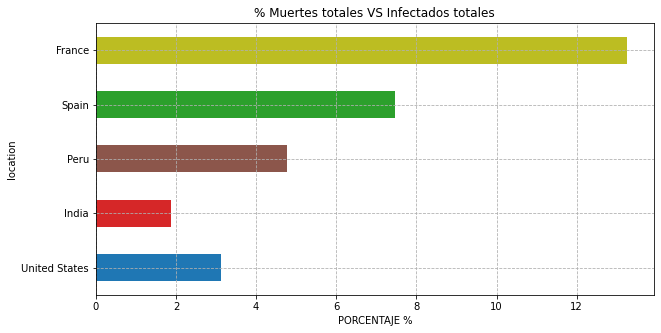

In [179]:
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
fig=plt.figure
porcentaje_muertes_casos.plot(figsize=(10,5),kind='barh',color=colores_paises)
plt.title("% Muertes totales VS Infectados totales")
plt.grid(linestyle ='dashed')
plt.xlabel("PORCENTAJE %")
plt.show()


In [180]:
porcentaje_recuperados_casos=porcentaje3*100/porcentaje1

In [181]:
porcentaje_recuperados_casos
porcentaje_recuperados_casos.round(2)

location
United States    96.87
India            98.11
Peru             95.23
Spain            92.53
France           86.74
dtype: float64

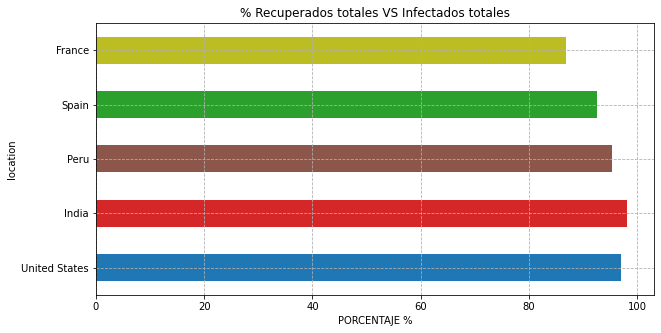

In [182]:
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
fig=plt.figure
porcentaje_recuperados_casos.plot(figsize=(10,5),kind='barh',color=colores_paises)
plt.title("% Recuperados totales VS Infectados totales")
plt.grid(linestyle ='dashed')
plt.xlabel("PORCENTAJE %")
plt.show()

In [183]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS MUERTES DIARIAS DE CADA PAIS CON UN COLOR EN TENDENCIA ESCENDENTE Y OTRO EN TENDENCIA DESCENDENTE#   $$$$$$$$$$$$$$$$$$$$$$$
#Muestro en un primer  gráfico el periodo de cada pais desde 15-02-20 hasta fecha actual para ver cuando comenzó a subir y luego a bajar-
#En un segundo gráfico hago la muestra de la curva de ese perido con diferentes colores.

In [184]:
curva_france=n_d.iloc[:,0]
curva_france
#Sacamos todos los datos para indagar en que momento se produce una tendencia descendenta de manera consolidada.

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-08-18    19.0
2020-08-19    22.0
2020-08-20    17.0
2020-08-21    12.0
2020-08-22    23.0
Name: France, Length: 177, dtype: float64

In [185]:
datos_france=n_d.loc["2020-03-19":"2020-04-30", "France"]
datos_france
 #Se considera que comienza a  subir el 20-03-2020 y después de varios repuntes por encima de 1000 muertes, el 17-04-2020 comienza a bajar la tendencia.

date
2020-03-19      69.0
2020-03-20     128.0
2020-03-21      78.0
2020-03-22     112.0
2020-03-23     112.0
2020-03-24     186.0
2020-03-25     240.0
2020-03-26     231.0
2020-03-27     365.0
2020-03-28     299.0
2020-03-29     319.0
2020-03-30     292.0
2020-03-31     418.0
2020-04-01     499.0
2020-04-02     509.0
2020-04-03     471.0
2020-04-04    2004.0
2020-04-05    1053.0
2020-04-06     518.0
2020-04-07     833.0
2020-04-08    1417.0
2020-04-09     541.0
2020-04-10    1341.0
2020-04-11     987.0
2020-04-12     635.0
2020-04-13     561.0
2020-04-14     574.0
2020-04-15     762.0
2020-04-16    1438.0
2020-04-17     753.0
2020-04-18     761.0
2020-04-19     642.0
2020-04-20     395.0
2020-04-21     547.0
2020-04-22     531.0
2020-04-23     544.0
2020-04-24     516.0
2020-04-25     389.0
2020-04-26     369.0
2020-04-27     242.0
2020-04-28     437.0
2020-04-29     367.0
2020-04-30     427.0
Name: France, dtype: float64

In [186]:

# @joseMaria 
# JMGONB
#$$$$ Francia muertes por día 15-02-2020 a día atual.$$$$$$$

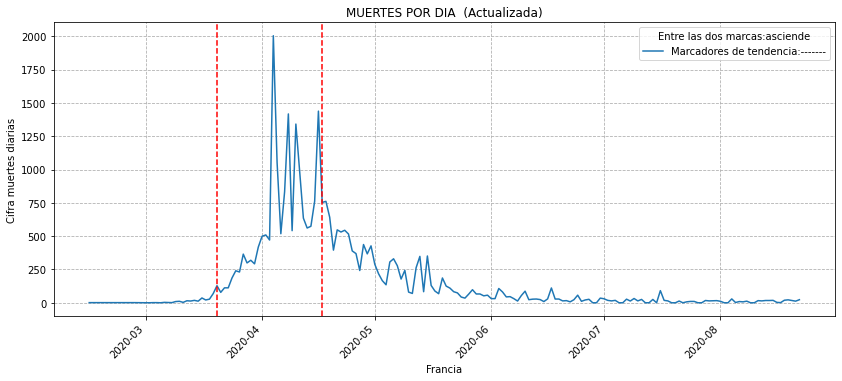

In [187]:
plt.figure(figsize=(14,6))
curva_france.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre las dos marcas:asciende")
plt.xlabel("Francia")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-03-20 ","2020-04-17 "] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [188]:
# @joseMaria 
# JMGONB
#$$$$ Francia muertes por día 20-03-2020 a día 17-04-2020. que es el día que sucede una inflexion y comienza a bajar.$$$$$$$

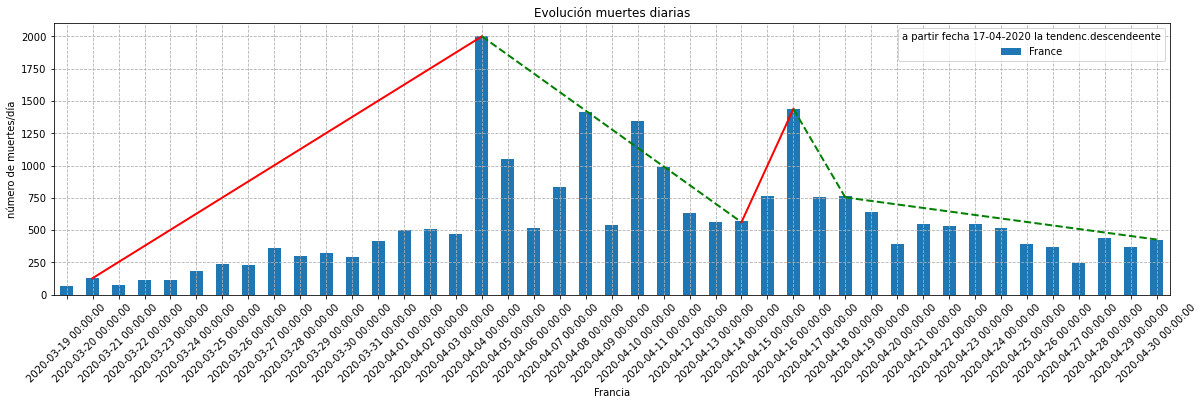

In [189]:
plt.figure(figsize=(20,5))
datos_france.plot(kind='bar')
plt.legend(title="a partir fecha 17-04-2020 la tendenc.descendeente")
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Francia")
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.plot ([1 ,16], [ 128,2000 ],lw = 2,color='r')
plt.plot ([16 ,26], [ 2000,561 ],lw = 2,color='g',linestyle="--")
plt.plot ([26 ,28], [561,1438],lw = 2,color='r')
plt.plot ([28 ,30], [1438,753],lw = 2,color='g',linestyle="--")
plt.plot ([30 ,42], [753,427],lw = 2,color='g',linestyle="--")


In [190]:
# @joseMaria 
# JMGONB

#$$$$ India muertes por día 15-02-2020 a día atual.$$$$$$$

In [191]:
curva_india=n_d.iloc[:,1]
curva_india
#Sacamos todos los datos para indagar en que momento se produce una tendencia descendenta de manera consolidada.

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-18     876.0
2020-08-19    1092.0
2020-08-20     977.0
2020-08-21     983.0
2020-08-22     945.0
Name: India, Length: 177, dtype: float64

In [192]:
datos_india=n_d.loc["2020-04-02":"2020-08-07","India" ] 
datos_india

date
2020-04-02     15.0
2020-04-03      6.0
2020-04-04     12.0
2020-04-05      9.0
2020-04-06     32.0
              ...  
2020-08-03    771.0
2020-08-04    803.0
2020-08-05    857.0
2020-08-06    904.0
2020-08-07    886.0
Name: India, Length: 128, dtype: float64

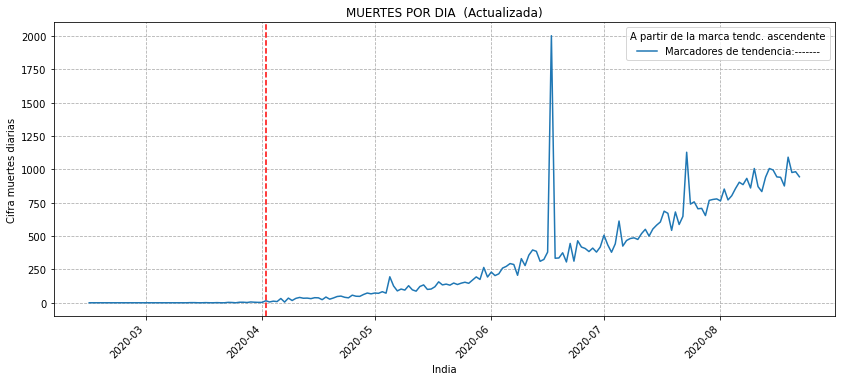

In [193]:
plt.figure(figsize=(14,6))
curva_india.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="A partir de la marca tendc. ascendente")
plt.xlabel("India")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-02 "] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")


In [194]:
# @joseMaria 
# JMGONB
#$$$$ India muertes desde el día 02-04-2020  que no han dejado de descender.$$$$$$$

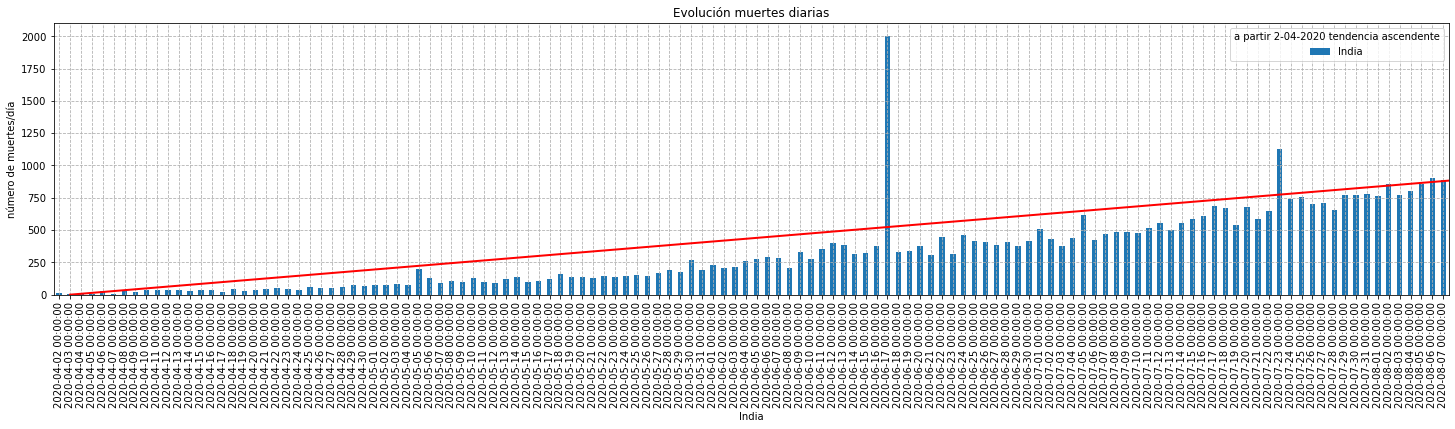

In [195]:
plt.figure(figsize=(25,5))
datos_india.plot(kind='bar')
plt.legend(title="a partir 2-04-2020 tendencia ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("India")
plt.plot ([1 ,128], [0,886],lw = 2,color='r')


In [196]:
# @joseMaria 
# JMGONB
#$$$$ Peru muertes por día 15-02-2020 a día atual.$$$$$$$

In [197]:
curva_peru=n_d.iloc[:,2]

In [198]:
curva_peru

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-18    200.0
2020-08-19    177.0
2020-08-20    176.0
2020-08-21    200.0
2020-08-22    211.0
Name: Peru, Length: 177, dtype: float64

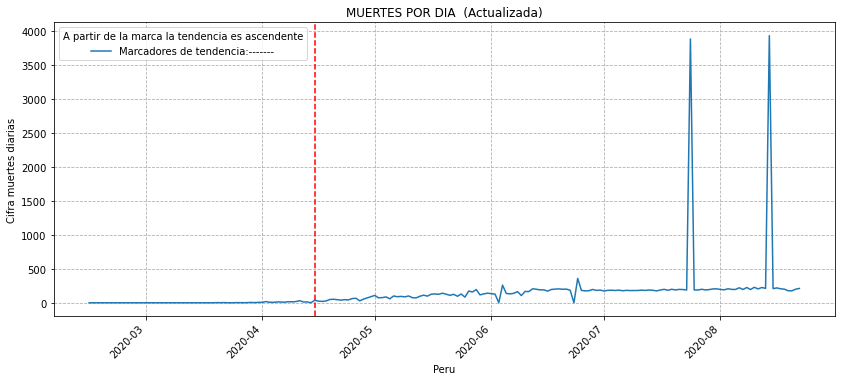

In [199]:
plt.figure(figsize=(14,6))
curva_peru.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="A partir de la marca la tendencia es ascendente")
plt.xlabel("Peru")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-15"] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [200]:
# @joseMaria 
# JMGONB
#$$$$ Perú muertes desde el día 15-04-2020  que no han dejado de descender hasta el 24-07-2020 fecha en la que tenemos un outlier sospechoso que mostramos en el último plot de este punto..$$$$$$$

In [201]:
datos_peru=n_d.loc["2020-04-15":"2020-08-07","Peru" ] 
datos_peru

date
2020-04-15     37.0
2020-04-16     24.0
2020-04-17     20.0
2020-04-18     26.0
2020-04-19     48.0
              ...  
2020-08-03    206.0
2020-08-04    197.0
2020-08-05    196.0
2020-08-06    221.0
2020-08-07    196.0
Name: Peru, Length: 115, dtype: float64

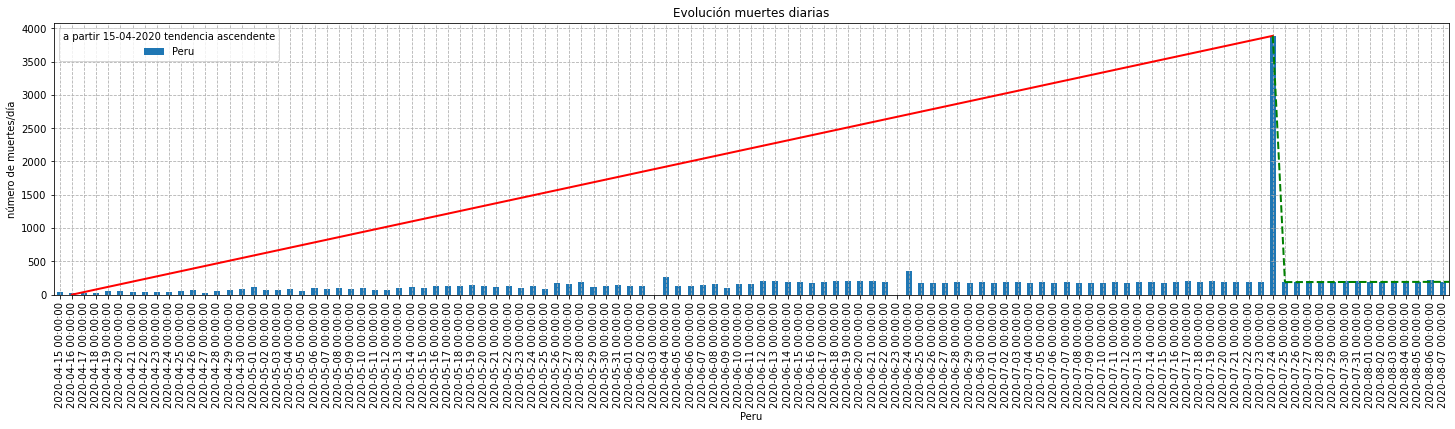

In [202]:
plt.figure(figsize=(25,5))
datos_peru.plot(kind='bar')
plt.legend(title="a partir 15-04-2020 tendencia ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("Peru")
plt.plot ([1 ,100], [0,3887],lw = 2,color='r')
plt.plot ([100 ,101], [3887,189],lw = 2,color='g',linestyle="--")
plt.plot ([101 ,128], [189,196],lw = 2,color='g',linestyle="--")

In [203]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Peru---Outlier sospechoso con fecha 24-07-2020 (Muertos en ese dia 3887 personas) $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [204]:
import seaborn as sns
Q1=datos_peru.quantile(0.25)
Q3=datos_peru.quantile(0.75)
IQR=Q3-Q1
print(IQR)

93.5


In [205]:
out2=datos_peru[((datos_peru< (Q1-1.5*IQR))|(datos_peru>(Q3 + 2*IQR))).any(axis=0)]

No handles with labels found to put in legend.


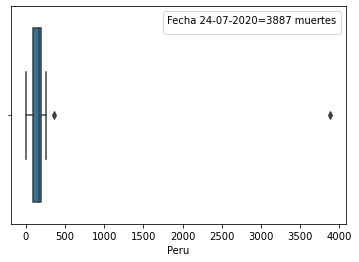

In [206]:
sns.boxplot(x=datos_peru.loc["2020-04-15":"2020-08-07"])
plt.legend(title="Fecha 24-07-2020=3887 muertes")

In [207]:
# @joseMaria 
# JMGONB
#$$$$ España muertes por día 15-02-2020 a día atual.$$$$$$$

In [208]:
curva_españa=n_d.iloc[:,3]
curva_españa

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-18     24.0
2020-08-19    127.0
2020-08-20     16.0
2020-08-21     25.0
2020-08-22      0.0
Name: Spain, Length: 177, dtype: float64

In [209]:
datos_españa=n_d.loc["2020-03-15":"2020-06-19","Spain" ] 
datos_españa

date
2020-03-15      15.0
2020-03-16     152.0
2020-03-17      21.0
2020-03-18     182.0
2020-03-19     107.0
               ...  
2020-06-15       0.0
2020-06-16       0.0
2020-06-17       0.0
2020-06-18       0.0
2020-06-19    1179.0
Name: Spain, Length: 97, dtype: float64

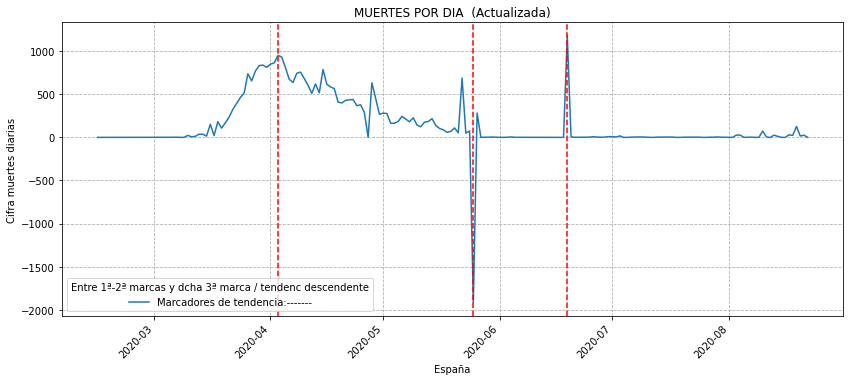

In [210]:
plt.figure(figsize=(14,6))
curva_españa.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre 1ª-2ª marcas y dcha 3ª marca / tendenc descendente")
plt.xlabel("España")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-03","2020-05-25","2020-06-19"]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [211]:
# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$ España muertes desde el día 15-03-2020  hasta el 19-06-2020. Tenemos un outlier, y dias en los que los datos son sin muertes porque la administración no notificaba cifras actualizadas.$$$$$$$$$$$$$$

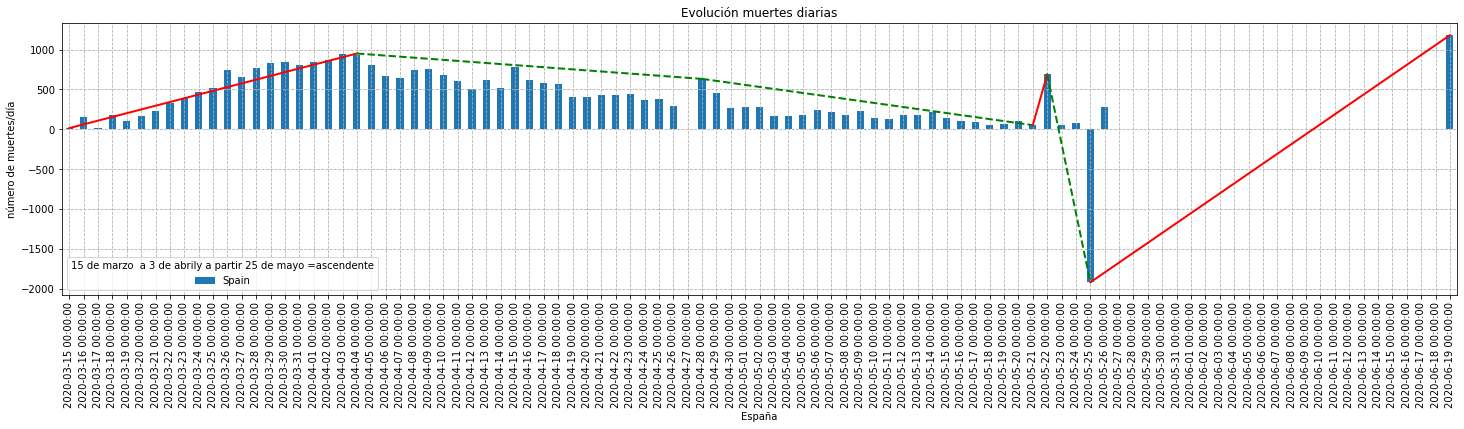

In [212]:
plt.figure(figsize=(25,5))
datos_españa.plot(kind='bar')
plt.legend(title="15 de marzo  a 3 de abrily a partir 25 de mayo =ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("España")
plt.plot ([0 ,20], [15,950],lw = 2,color='r')
plt.plot ([20 ,44], [950,632],lw = 2,color='g',linestyle="--")
plt.plot ([44 ,67], [632,52],lw = 2,color='g',linestyle="--")
plt.plot ([67 ,68], [52,688],lw = 2,color='r')
plt.plot ([68 ,71], [688,-1918],lw = 2,color='g',linestyle="--")
plt.plot ([71 ,96], [-1918,1179],lw = 2,color='r')

In [213]:
# @joseMaria 
# JMGONB
#$$$$ EEUU muertes por día 15-02-2020 a día atual.$$$$$$$

In [214]:
curva_EEUU=n_d.iloc[:,4]
curva_EEUU

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       1.0
2020-03-02       1.0
2020-03-03       4.0
               ...  
2020-08-18     445.0
2020-08-19    1324.0
2020-08-20    1356.0
2020-08-21    1078.0
2020-08-22    1151.0
Name: United States, Length: 177, dtype: float64

In [215]:
datos_EEUU=n_d.loc["2020-03-23":"2020-07-01","United States"]
datos_EEUU					


date
2020-03-23     131.0
2020-03-24     119.0
2020-03-25     211.0
2020-03-26     249.0
2020-03-27     246.0
               ...  
2020-06-27     623.0
2020-06-28     500.0
2020-06-29     265.0
2020-06-30     336.0
2020-07-01    1270.0
Name: United States, Length: 101, dtype: float64

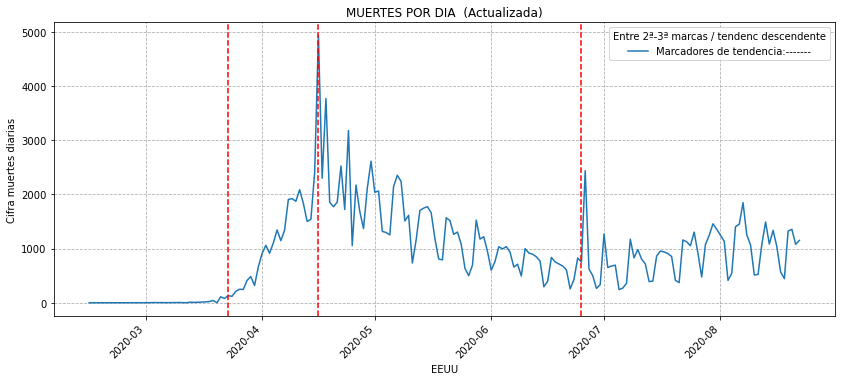

In [216]:
plt.figure(figsize=(14,6))
curva_EEUU.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre 2ª-3ª marcas / tendenc descendente")
plt.xlabel("EEUU")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-03-23","2020-04-16","2020-06-25"]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [217]:
# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$ EEUU muertes desde 23-03-2020 a 1-07-2020 /del 3 a 23 de marzo y a partir 25 de junio=ascendiente"

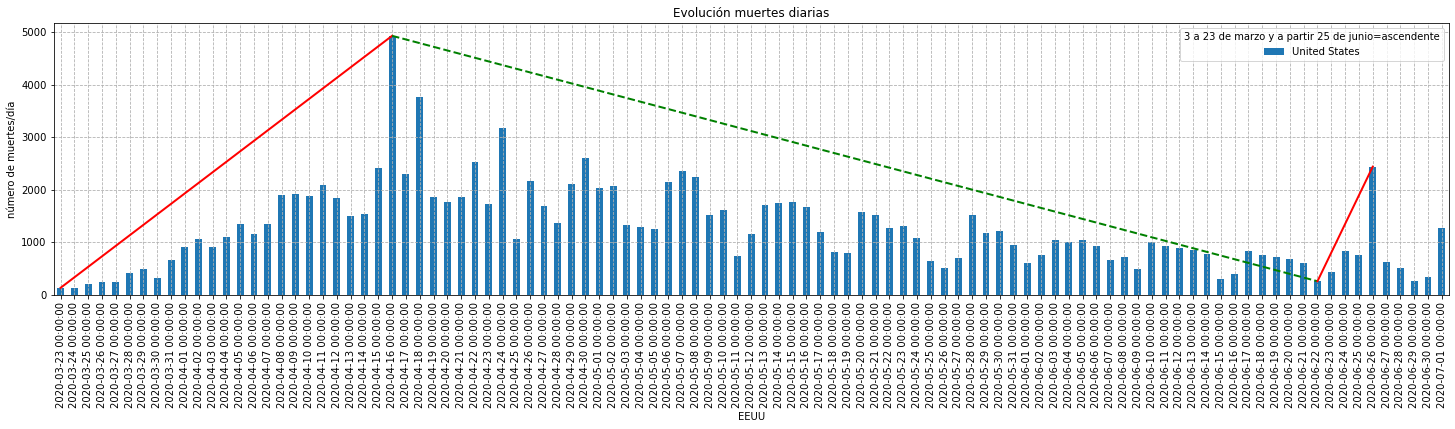

In [218]:
plt.figure(figsize=(25,5))
datos_EEUU.plot(kind='bar')
plt.legend(title="3 a 23 de marzo y a partir 25 de junio=ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("EEUU")
plt.plot ([0 ,24], [131,4928],lw = 2,color='r')
plt.plot ([24 ,91], [4928,256],lw = 2,color='g',linestyle="--")
plt.plot ([91 ,95], [256,2437],lw = 2,color='r')

Total casos  Total muertes
Total casos        1.00000        0.94958
Total muertes      0.94958        1.00000

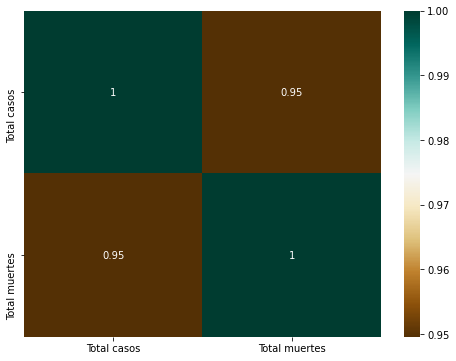

In [219]:
plt.figure(figsize=(8,6))
c=total_cas_total_dead.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [220]:
pop=df1.pivot_table('population_density', index='date',columns='location')
pop=pop.fillna(0)
pop

location     France    India    Peru   Spain  United States
date                                                       
2019-12-31  122.578  450.419   0.000  93.105         35.608
2020-01-01  122.578  450.419   0.000  93.105         35.608
2020-01-02  122.578  450.419   0.000  93.105         35.608
2020-01-03  122.578  450.419   0.000  93.105         35.608
2020-01-04  122.578  450.419   0.000  93.105         35.608
...             ...      ...     ...     ...            ...
2020-08-18  122.578  450.419  25.129  93.105         35.608
2020-08-19  122.578  450.419  25.129  93.105         35.608
2020-08-20  122.578  450.419  25.129  93.105         35.608
2020-08-21  122.578  450.419  25.129  93.105         35.608
2020-08-22  122.578  450.419  25.129   0.000         35.608

[236 rows x 5 columns]

In [221]:
pop=pop.iloc[-2,:] 
pop

location
France           122.578
India            450.419
Peru              25.129
Spain             93.105
United States     35.608
Name: 2020-08-21 00:00:00, dtype: float64

In [222]:
pop1=pd.merge(total_cas_total_dead,pop,on='location',how='outer')
pop1=pop1.fillna(0)


In [223]:
pop1

Total casos  Total muertes  2020-08-21 00:00:00
location                                                      
United States    5573847.0       174255.0               35.608
India            2905823.0        54849.0              450.419
Peru              567059.0        27034.0               25.129
Spain             386054.0        28838.0               93.105
France            229814.0        30480.0              122.578

In [224]:
pop1.columns=["Total casos","Total muertes","Densidad de Poblacion"]
pop1

Total casos  Total muertes  Densidad de Poblacion
location                                                        
United States    5573847.0       174255.0                 35.608
India            2905823.0        54849.0                450.419
Peru              567059.0        27034.0                 25.129
Spain             386054.0        28838.0                 93.105
France            229814.0        30480.0                122.578

Total casos  Total muertes  Densidad de Poblacion
Total casos               1.000000       0.949580               0.111775
Total muertes             0.949580       1.000000              -0.177225
Densidad de Poblacion     0.111775      -0.177225               1.000000

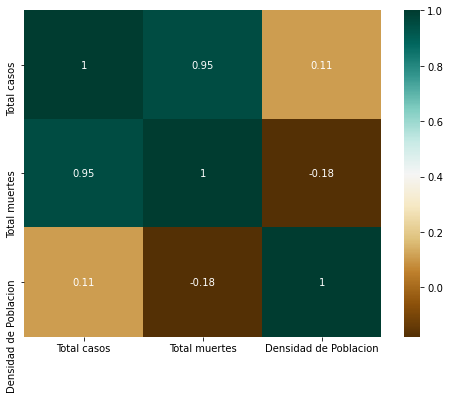

In [225]:
plt.figure(figsize=(8,6))
c=pop1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
#Cómo podemos observar los cuadros con valor 1 son los más fuertemente correlacionados, como es de esperar, a más densidad de población, se dan más casos y mas muertes.

In [226]:
#$$$$$$$$$$$$$$$$$$$$$$$ NUEVOS CONTAGIOS CON UNA FRECUENCIA DE CADA 10 DIAS DURENTE EL PERIODO DE ALARMA DE CADA PAIS $$$$$$$$$$$$

In [227]:
t_n_france_1=n_c.loc["2020-03-13":"2020-07-20","France"]
t_n_france_1

date
2020-03-13     595.0
2020-03-14     785.0
2020-03-15     838.0
2020-03-16     924.0
2020-03-17    1210.0
               ...  
2020-07-16     927.0
2020-07-17     534.0
2020-07-18     836.0
2020-07-19       0.0
2020-07-20       0.0
Name: France, Length: 130, dtype: float64

In [228]:
frecuenc_france=t_n_france_1.resample("10d", label="right").sum()
frecuenc_france

date
2020-03-23    12178.0
2020-04-02    37669.0
2020-04-12    38548.0
2020-04-22    23981.0
2020-05-02    14924.0
2020-05-12     9482.0
2020-05-22     4782.0
2020-06-01     7651.0
2020-06-11     3095.0
2020-06-21     4861.0
2020-07-01     4808.0
2020-07-11     5834.0
2020-07-21     4580.0
Freq: 10D, Name: France, dtype: float64

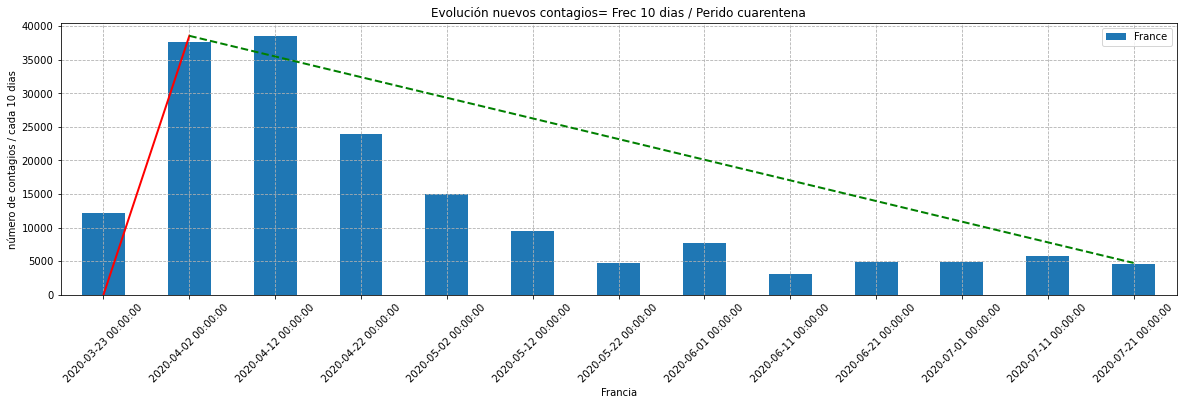

In [229]:
plt.figure(figsize=(20,5))
frecuenc_france.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Francia")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([0 ,1], [ 3,38548],lw = 2,color='r')
plt.plot ([1 ,12], [38548,4724 ],lw = 2,color='g',linestyle="--")
# Al ir de 10 en 10 días aunque el perido de cuarentena comenzó el 23-03-2020 comienza 

In [230]:
t_n_india_1=n_c.loc[:,"India"]

In [231]:
t_n_india_1=t_n_india_1[37::]
t_n_india_1

date
2020-03-14        8.0
2020-03-15        7.0
2020-03-16        3.0
2020-03-17       32.0
2020-03-18       12.0
               ...   
2020-08-18    55079.0
2020-08-19    64531.0
2020-08-20    69652.0
2020-08-21    68898.0
2020-08-22    69878.0
Name: India, Length: 162, dtype: float64

In [232]:
frecuenc_india=t_n_india_1.resample("10d", label="right").sum()
frecuenc_india

date
2020-03-24       364.0
2020-04-03      1526.0
2020-04-13      6391.0
2020-04-23     11628.0
2020-05-03     17352.0
2020-05-13     33420.0
2020-05-23     47691.0
2020-06-02     72088.0
2020-06-12     96044.0
2020-06-22    123882.0
2020-07-02    175032.0
2020-07-12    235423.0
2020-07-22    334275.0
2020-08-01    483679.0
2020-08-11    576204.0
2020-08-21    621851.0
2020-08-31    138776.0
Freq: 10D, Name: India, dtype: float64

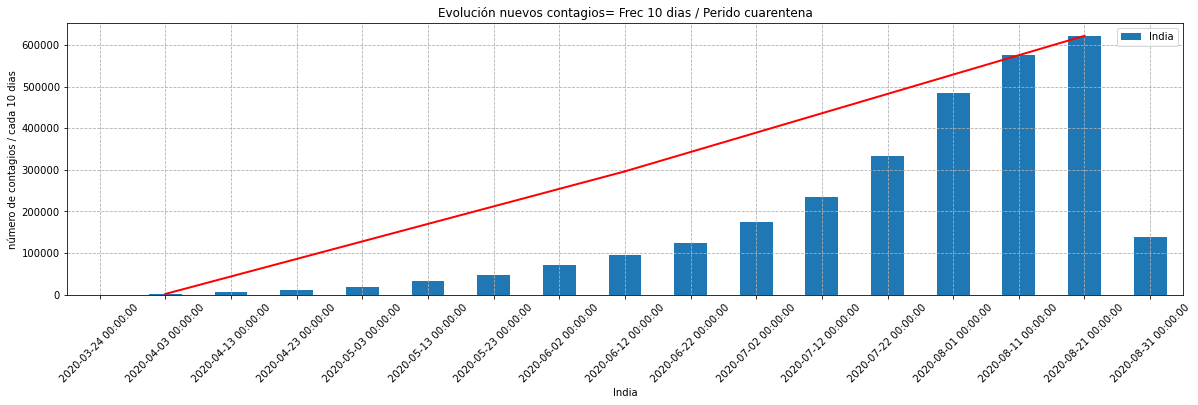

In [244]:
plt.figure(figsize=(20,5))
frecuenc_india.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("India")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([1 ,8], [ 1809, 296299  ],lw = 2,color='r')
plt.plot ([8 ,15], [296299,621851],lw = 2,color='r')

In [234]:
t_n_peru_1=n_c.loc[:,"Peru"]

In [235]:
t_n_peru_1=t_n_peru_1[29::]
t_n_peru_1

date
2020-03-06       0.0
2020-03-07       1.0
2020-03-08       0.0
2020-03-09       6.0
2020-03-10       2.0
               ...  
2020-08-18    5547.0
2020-08-19    7828.0
2020-08-20    9099.0
2020-08-21    8639.0
2020-08-22    9008.0
Name: Peru, Length: 170, dtype: float64

In [236]:
frecuenc_peru=t_n_peru_1.resample("10d", label="right").sum()
frecuenc_peru

date
2020-03-16       43.0
2020-03-26      373.0
2020-04-05     1179.0
2020-04-15     5924.0
2020-04-25    13395.0
2020-05-05    25014.0
2020-05-15    30378.0
2020-05-25    39448.0
2020-06-04    54285.0
2020-06-14    50710.0
2020-06-24    34187.0
2020-07-04    37068.0
2020-07-14    34322.0
2020-07-24    40224.0
2020-08-03    55633.0
2020-08-13    67497.0
2020-08-23    86387.0
Freq: 10D, Name: Peru, dtype: float64

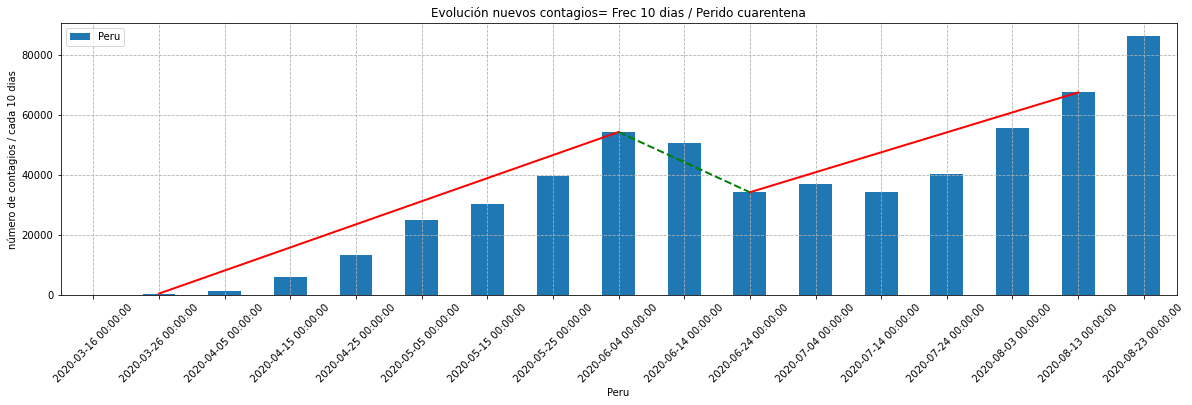

In [237]:
plt.figure(figsize=(20,5))
frecuenc_peru.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Peru")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([1 ,8], [ 373,54285],lw = 2,color='r')
plt.plot ([8 ,10], [54285, 34187 ],lw = 2,color='g',linestyle="--")
plt.plot ([10 ,15], [ 34187,67497],lw = 2,color='r')

In [238]:
t_n_spain_1=n_c.loc["2020-03-04":"2020-06-21","Spain"]
t_n_spain_1

date
2020-03-04     75.0
2020-03-05     81.0
2020-03-06    183.0
2020-03-07    233.0
2020-03-08    330.0
              ...  
2020-06-17    355.0
2020-06-18    585.0
2020-06-19    307.0
2020-06-20    363.0
2020-06-21    334.0
Name: Spain, Length: 110, dtype: float64

In [239]:
frecuenc_spain=t_n_spain_1.resample("10d", label="right").sum()
frecuenc_spain

date
2020-03-14     5766.0
2020-03-24    35304.0
2020-04-03    78001.0
2020-04-13    52658.0
2020-04-23    28812.0
2020-05-03    17071.0
2020-05-13    10448.0
2020-05-23     6572.0
2020-06-02     4814.0
2020-06-12     3069.0
2020-06-22     3565.0
Freq: 10D, Name: Spain, dtype: float64

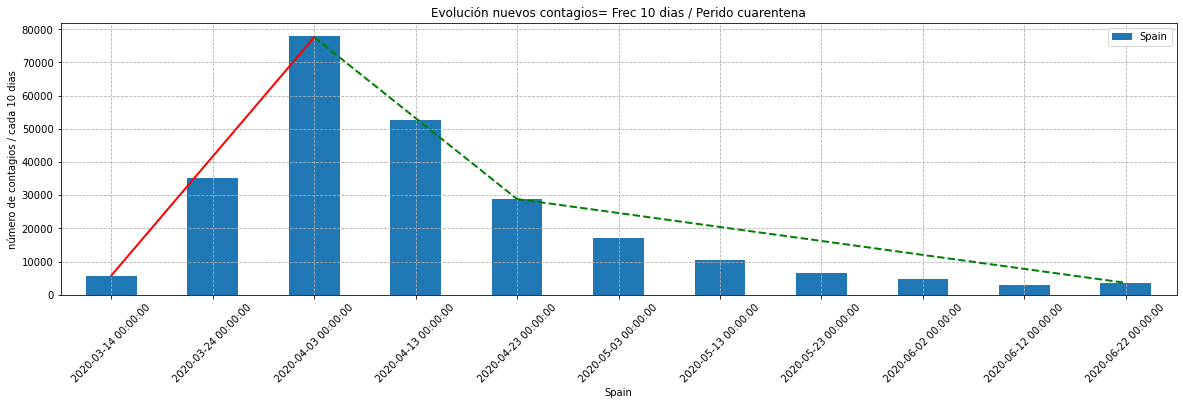

In [240]:
plt.figure(figsize=(20,5))
frecuenc_spain.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Spain")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([0 ,2], [ 5766,77582],lw = 2,color='r')
plt.plot ([2 ,4], [77582, 28812 ],lw = 2,color='g',linestyle="--")
plt.plot ([4 ,10], [28812, 3565],lw = 2,color='g',linestyle="--")

In [241]:
t_n_eeuu_1=n_c.loc["2020-03-03":"2020-07-21","United States"]
t_n_eeuu_1

date
2020-03-03       14.0
2020-03-04       22.0
2020-03-05       34.0
2020-03-06       74.0
2020-03-07      105.0
               ...   
2020-07-17    76930.0
2020-07-18    71494.0
2020-07-19    63749.0
2020-07-20    61796.0
2020-07-21    56750.0
Name: United States, Length: 141, dtype: float64

In [242]:
frecuenc_eeuu=t_n_eeuu_1.resample("10d", label="right").sum()
frecuenc_eeuu

date
2020-03-13      1223.0
2020-03-23     25435.0
2020-04-02    162871.0
2020-04-12    311942.0
2020-04-22    286192.0
2020-05-02    282074.0
2020-05-12    259973.0
2020-05-22    222054.0
2020-06-01    218531.0
2020-06-11    209466.0
2020-06-21    241111.0
2020-07-01    369591.0
2020-07-11    527456.0
2020-07-21    655252.0
2020-07-31     56750.0
Freq: 10D, Name: United States, dtype: float64

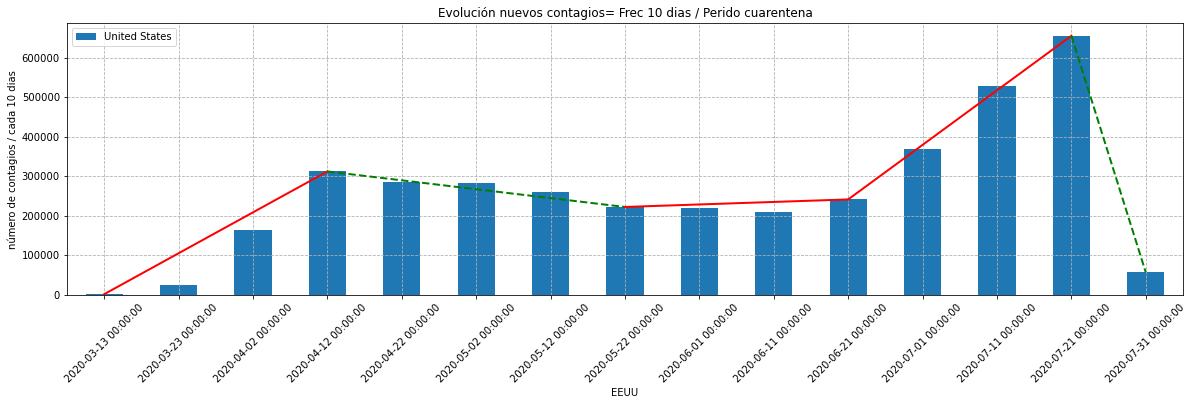

In [243]:
plt.figure(figsize=(20,5))
frecuenc_eeuu.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("EEUU")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([0 ,3], [ 1223,311942],lw = 2,color='r')
plt.plot ([3 ,7], [ 311942,222054],lw = 2,color='g',linestyle="--")
plt.plot ([7 ,10], [ 222054, 241111],lw = 2,color='r')
plt.plot ([10 ,13], [241111,655252 ],lw = 2,color='r')
plt.plot ([13 ,14], [655252,56750],lw = 2,color='g',linestyle="--")